In [1]:
import os 
import requests
from bs4 import BeautifulSoup
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Comment out API keys to avoid running cells by accident

# api read key created at https://develop.purpleair.com/keys
api_read_key = "1A4A4B7E-BF7D-11EE-8616-42010A80000B"

# api write key created at https://develop.purpleair.com/keys
api_write_key = "FFAF2E2E-BF85-11EE-8616-42010A80000B"

In [3]:
# open variables json and assign to p_air_vars variable
with open('purple-air-variables.json') as f:
    p_air_vars = json.load(f)

# pull in the list of test sensors as sensor_test
sensor_test = p_air_vars['sensor_test']
sensor_test

[53, 77, 81, 443, 820]

In [4]:
# create function to pull all data from a sensor
def pull_sensor_data(sensor_id, p_air_READ_API_key):
    url = f"https://api.purpleair.com/v1/sensors/{sensor_id}"
    headers = {
        "X-API-Key": p_air_READ_API_key
        }
    
    sensor_response = requests.get(url, headers=headers)
    sensor_response_json = sensor_response.json()
    sensor_data = sensor_response_json.get('sensor')
    return sensor_data

In [5]:
list_of_test_sensors = []

for sensor in sensor_test:
    sensor_data = pull_sensor_data(sensor, api_read_key)
    list_of_test_sensors.append(sensor_data)

In [6]:
sample_sensor_df = pd.DataFrame(list_of_test_sensors)
sample_sensor_df

,sensor_index,last_modified,date_created,last_seen,private,is_owner,name,icon,location_type,model,...,5.0_um_count_b,10.0_um_count_b,pm1.0_cf_1_b,pm1.0_atm_b,pm2.5_atm_b,pm2.5_cf_1_b,pm10.0_atm_b,pm10.0_cf_1_b,stats_b,altitude
0,53,1520025982,1454548891,1707486091,0,0,Lakeshore,0,0,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,77,1575074907,1456896339,1707486035,0,0,Sunnyside,0,0,PA-I,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,81,1465680292,1465657200,1707486134,0,0,Sherwood Hills 2,0,0,UNKNOWN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,443,1559966508,1478491864,1707486041,0,0,Weber-Morgan Health Department P1,0,0,PA-II,...,0.0,0.0,11.37,11.37,11.6,11.6,11.83,11.83,"{'pm2.5': 11.6, 'pm2.5_10minute': 10.4, 'pm2.5...",NaN
4,820,1575003401,1483643179,1707486055,0,0,Granite Basement,0,1,PA-II,...,0.0,0.0,0.00,0.00,0.0,0.0,0.00,0.00,"{'pm2.5': 0.0, 'pm2.5_10minute': 0.0, 'pm2.5_3...",5131.0


In [7]:
sample_sensor_df['last_modified'] = pd.to_datetime(sample_sensor_df['last_modified'], unit='s')
sample_sensor_df['date_created'] = pd.to_datetime(sample_sensor_df['date_created'], unit='s')
sample_sensor_df['last_seen'] = pd.to_datetime(sample_sensor_df['last_seen'], unit='s')

In [8]:
# commented out below, .csv exists in repo after first run, no longer needed

#sample_sensor_df.to_csv("sample_sensors.csv")

# Use all sensor data below

In [9]:
# pull in the list of ALL SLC sensors as slc_sensor_list
slc_sensor_list = p_air_vars['slc_sensor_list']


In [10]:
## EXPENSIVE cell. Pulls all 100+ columns for all 600+ sensors in SLC, outdoor and indoor
## The results are saved to slc_sensor_data_20240130.csv

# pull all SLC sensors into a list
# Cost of cell: 95480
# Time to run: 4 minutes

#list_of_slc_sensors = []

#for sensor in slc_sensor_list:
#    sensor_data = pull_sensor_data(sensor, api_read_key)
#    list_of_slc_sensors.append(sensor_data)

In [11]:
#slc_sensors_df = pd.DataFrame(list_of_slc_sensors)
#slc_sensors_df.to_csv('slc_sensor_data_20240130.csv')

In [12]:
# read in SLC sensor data from 1/30/24 snapshot
slc_sensor_eda = pd.read_csv('slc_sensor_data_20240130.csv')


In [13]:
slc_sensor_eda.describe().transpose().to_csv("slc_sensor_eda_describe.csv")

In [14]:
slc_sensor_eda.nunique()

Unnamed: 0       616
sensor_index     616
last_modified    616
date_created     616
last_seen        278
                ... 
humidity_b        27
temperature_b     33
pressure_b        55
voc               53
voc_b             54
Length: 110, dtype: int64

In [15]:
# look at value counts for each column
# skip the first two columns since we know they'll all be unique
for column in slc_sensor_eda.columns[2:]:
    value_counts = slc_sensor_eda[column].value_counts()
    print(f'Column: {column}\n{value_counts}\n')

Column: last_modified
1520025982    1
1630852908    1
1629328369    1
1631251784    1
1631251712    1
             ..
1616983651    1
1548026904    1
1575088844    1
1575004554    1
1706498344    1
Name: last_modified, Length: 616, dtype: int64

Column: date_created
1454548891    1
1625008888    1
1624396549    1
1624482883    1
1624482885    1
             ..
1547074682    1
1547228302    1
1547232395    1
1547745418    1
1703862440    1
Name: date_created, Length: 616, dtype: int64

Column: last_seen
1706641222    9
1706641173    7
1706641183    7
1706641257    7
1706641272    7
             ..
1706641121    1
1706641041    1
1706641178    1
1706641202    1
1706641396    1
Name: last_seen, Length: 278, dtype: int64

Column: private
0    616
Name: private, dtype: int64

Column: is_owner
0    616
Name: is_owner, dtype: int64

Column: name
Home                  3
Wasatch Hollow        2
Riverton              2
Buckboard             2
Payson Utah           2
                     ..
Bonne

In [16]:
slc_sensor_eda['last_modified'] = pd.to_datetime(slc_sensor_eda['last_modified'], unit='s')
slc_sensor_eda['date_created'] = pd.to_datetime(slc_sensor_eda['date_created'], unit='s')
slc_sensor_eda['last_seen'] = pd.to_datetime(slc_sensor_eda['last_seen'], unit='s')

slc_sensor_eda.head()

,Unnamed: 0,sensor_index,last_modified,date_created,last_seen,private,is_owner,name,icon,location_type,...,pm10.0_atm_b,pm10.0_cf_1_b,stats_b,altitude,ozone1,humidity_b,temperature_b,pressure_b,voc,voc_b
0,0,53,2018-03-02 21:26:22,2016-02-04 01:21:31,2024-01-30 18:59:33,0,0,Lakeshore,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,77,2019-11-30 00:48:27,2016-03-02 05:25:39,2024-01-30 18:59:30,0,0,Sunnyside,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,81,2016-06-11 21:24:52,2016-06-11 15:00:00,2024-01-30 18:59:22,0,0,Sherwood Hills 2,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,443,2019-06-08 04:01:48,2016-11-07 04:11:04,2024-01-30 18:58:00,0,0,Weber-Morgan Health Department P1,0,0,...,10.02,10.02,"{'pm2.5': 9.8, 'pm2.5_10minute': 7.8, 'pm2.5_3...",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,459,2022-05-29 03:50:54,2016-11-07 18:32:48,2024-01-30 18:58:27,0,0,Flight Park North 2,0,0,...,7.50,7.50,"{'pm2.5': 6.8, 'pm2.5_10minute': 9.4, 'pm2.5_3...",5122.0,NaN,NaN,NaN,NaN,NaN,NaN


In [17]:
oldest_sensor = slc_sensor_eda['date_created'].min()
oldest_sensor

Timestamp('2016-02-04 01:21:31')

In [18]:
# all dtypes
slc_sensor_eda.dtypes

# all number dtypes
numeric_columns = slc_sensor_eda.select_dtypes(include=np.number).columns.tolist()

In [19]:
slc_sensor_eda_numeric = slc_sensor_eda[numeric_columns]

In [20]:
slc_sensor_eda_numeric.columns

Index(['Unnamed: 0', 'sensor_index', 'private', 'is_owner', 'icon',
       'location_type', 'led_brightness', 'rssi', 'uptime', 'pa_latency',
       'memory', 'position_rating', 'latitude', 'longitude', 'channel_state',
       'channel_flags', 'channel_flags_manual', 'channel_flags_auto',
       'confidence', 'analog_input', 'pm1.0', 'pm1.0_a', 'pm2.5', 'pm2.5_a',
       'pm2.5_alt', 'pm2.5_alt_a', 'pm10.0', 'pm10.0_a',
       'scattering_coefficient', 'scattering_coefficient_a', 'deciviews',
       'deciviews_a', 'visual_range', 'visual_range_a', '0.3_um_count',
       '0.3_um_count_a', '0.5_um_count', '0.5_um_count_a', '1.0_um_count',
       '1.0_um_count_a', '2.5_um_count', '2.5_um_count_a', '5.0_um_count',
       '5.0_um_count_a', '10.0_um_count', '10.0_um_count_a', 'pm1.0_cf_1',
       'pm1.0_cf_1_a', 'pm1.0_atm', 'pm1.0_atm_a', 'pm2.5_atm', 'pm2.5_atm_a',
       'pm2.5_cf_1', 'pm2.5_cf_1_a', 'pm10.0_atm', 'pm10.0_atm_a',
       'pm10.0_cf_1', 'pm10.0_cf_1_a', 'primary_id_a', 'pri

# Compare Indoor and Outdoor Sensors

In [21]:
# subset data into indoor/outdoor numeric
slc_sensor_eda_outdoor = slc_sensor_eda_numeric[slc_sensor_eda_numeric['location_type'] == 0]
slc_sensor_eda_indoor = slc_sensor_eda_numeric[slc_sensor_eda_numeric['location_type'] == 1]

In [22]:
def plot_overlying_histograms(df1, label1, df2, label2, column):
    """
    Plot overlying histograms of a specified column from two dataframes.

    Parameters:
        df1 (DataFrame): First dataframe.
        label1 (string): Name to label the df1 in the legend.
        df2 (DataFrame): Second dataframe.
        label2 (string): Name to label the df2 in the legend.
        column (str): Name of the column to plot.

    Returns:
        None - plots the histograms
    """
    plt.figure(figsize=(8, 5))
    sns.histplot(df1[column], color='blue', alpha=0.5, label=label1)
    sns.histplot(df2[column], color='red', alpha=0.5, label=label2)
    plt.title(f'Overlying Histograms of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.legend()
    plt.show()

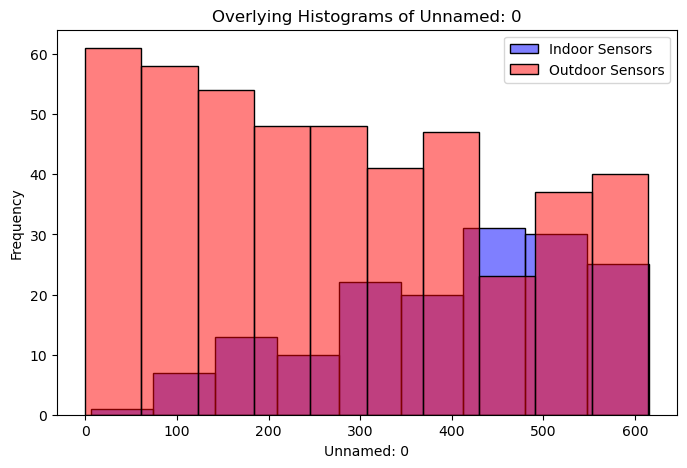

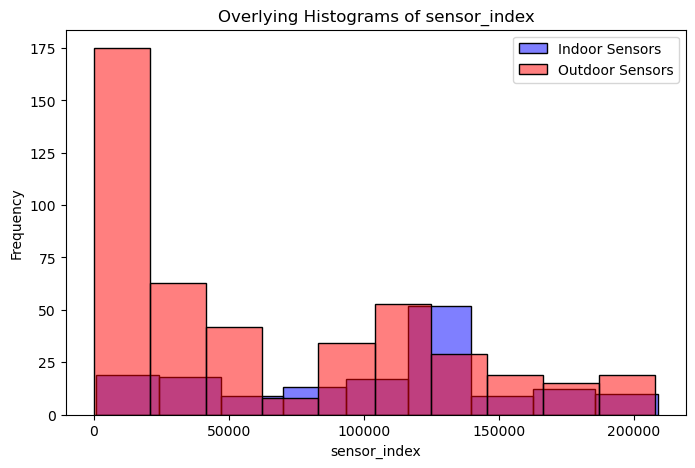

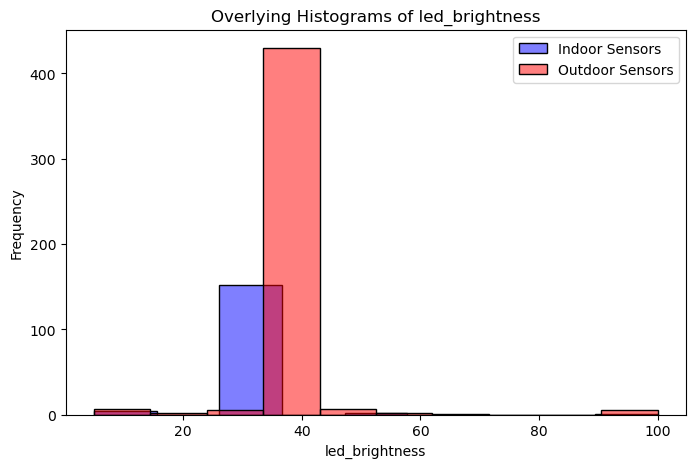

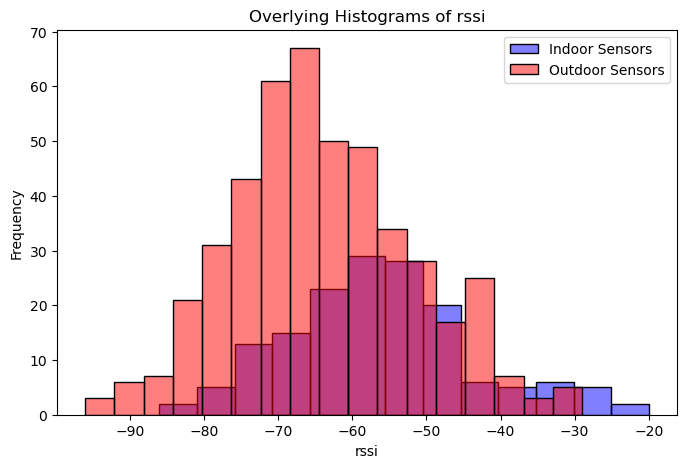

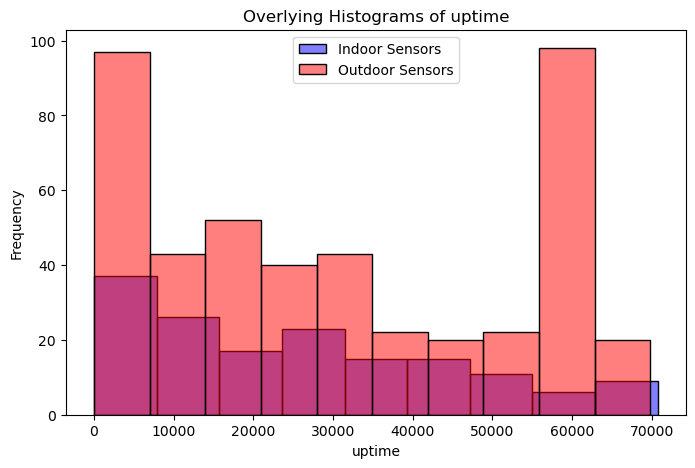

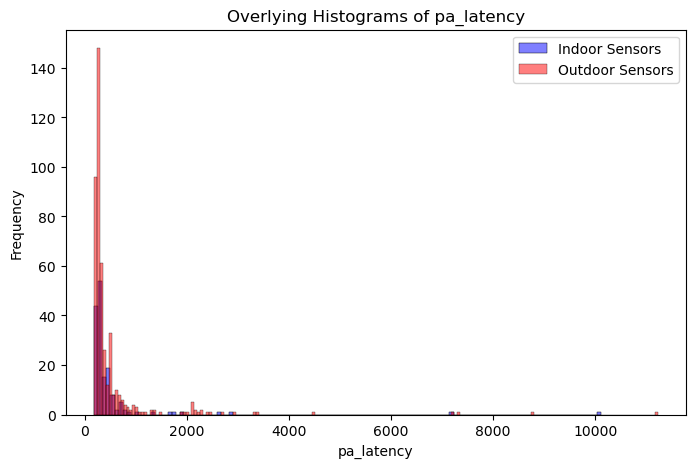

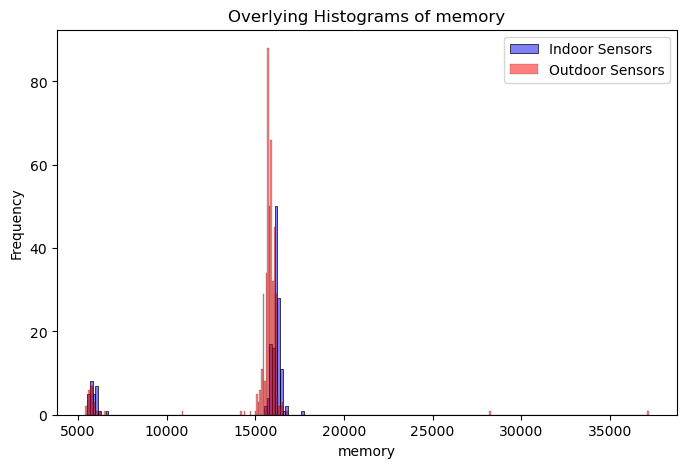

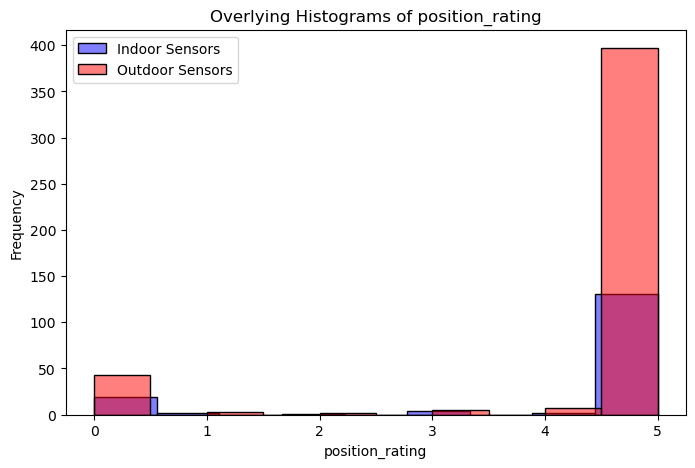

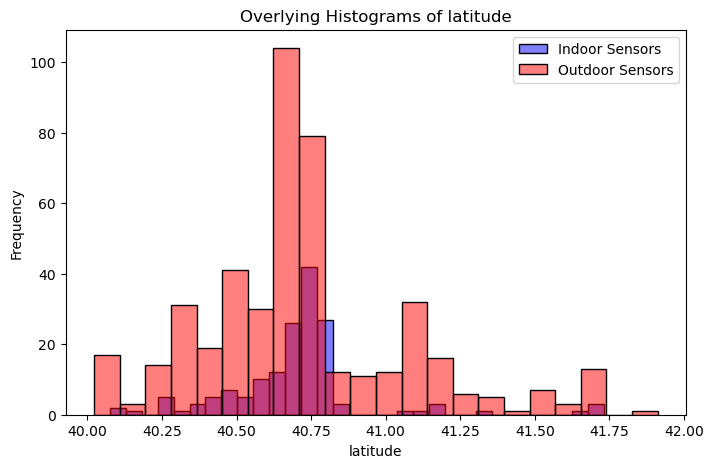

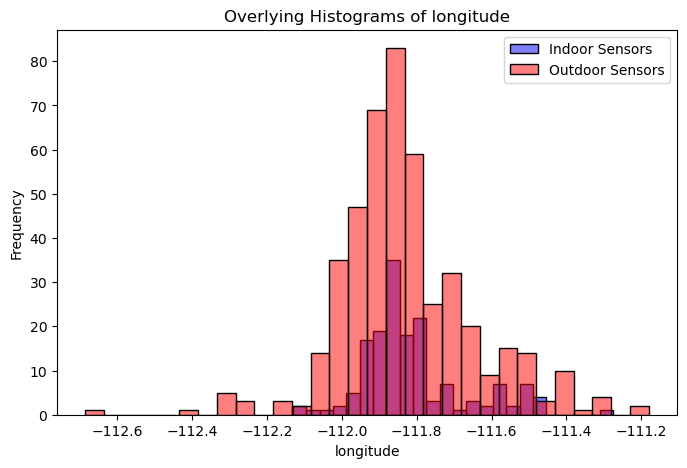

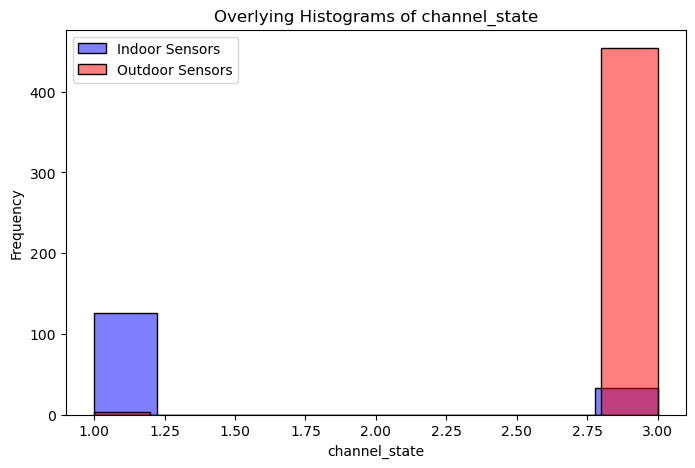

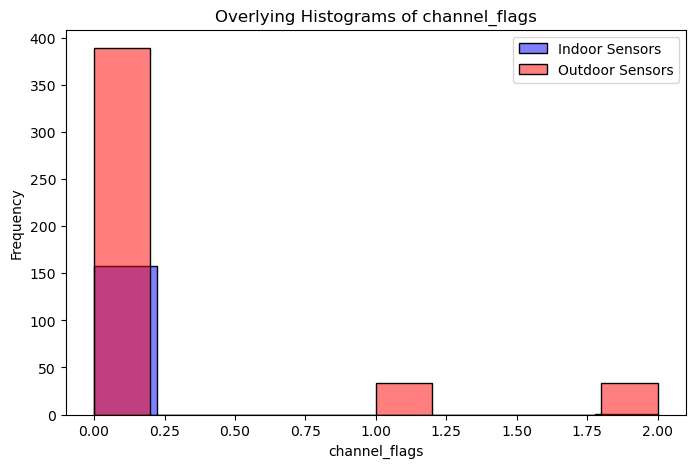

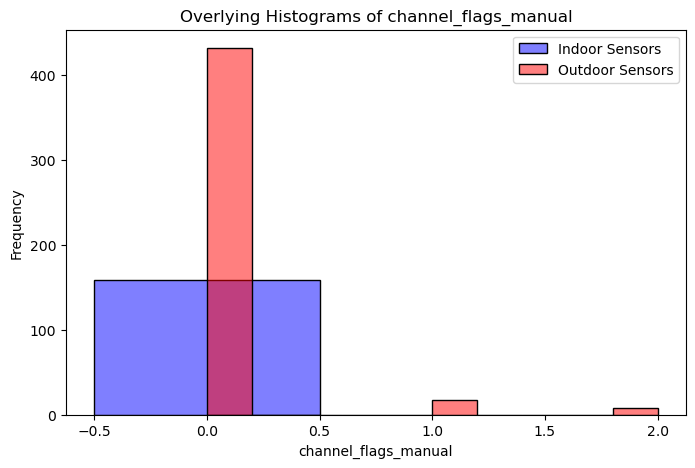

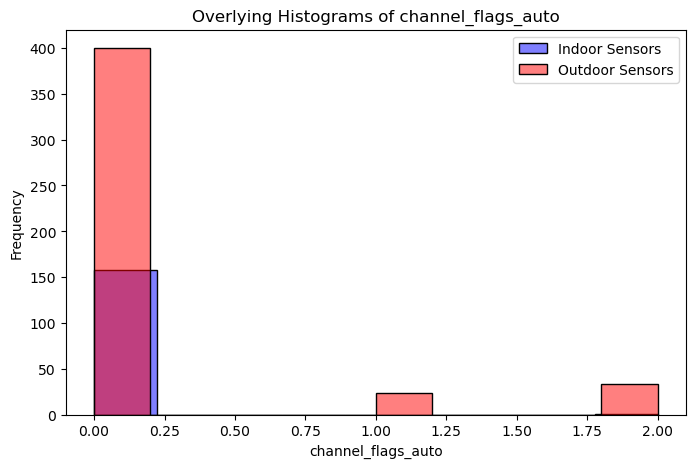

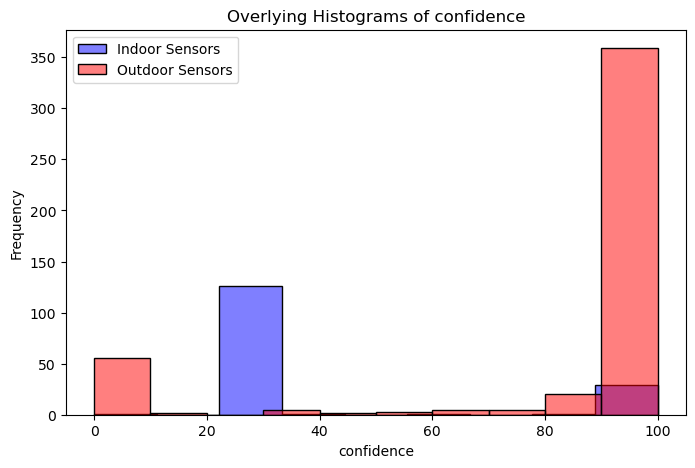

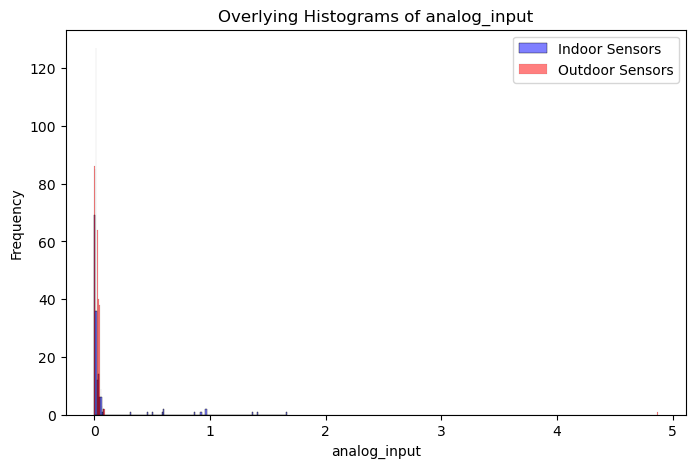

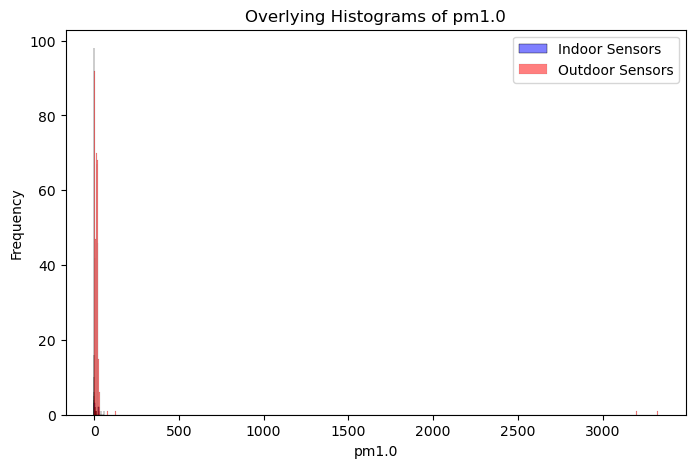

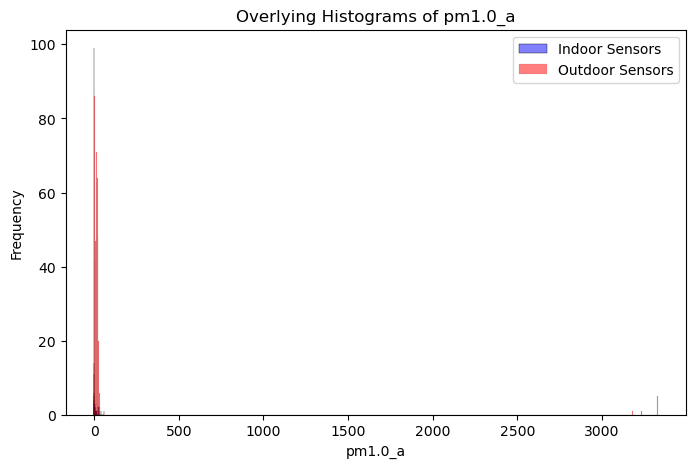

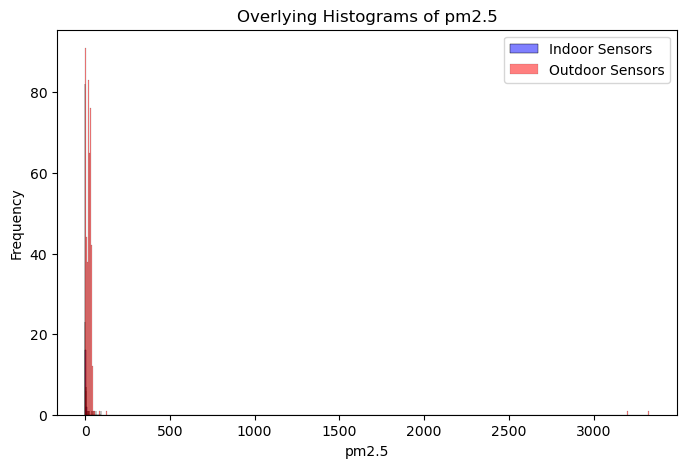

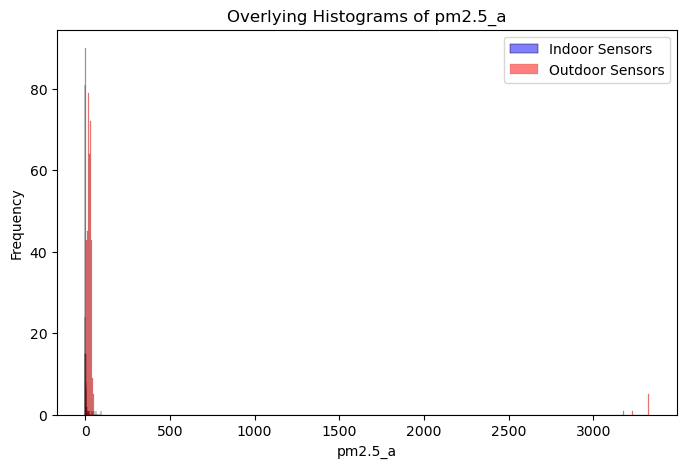

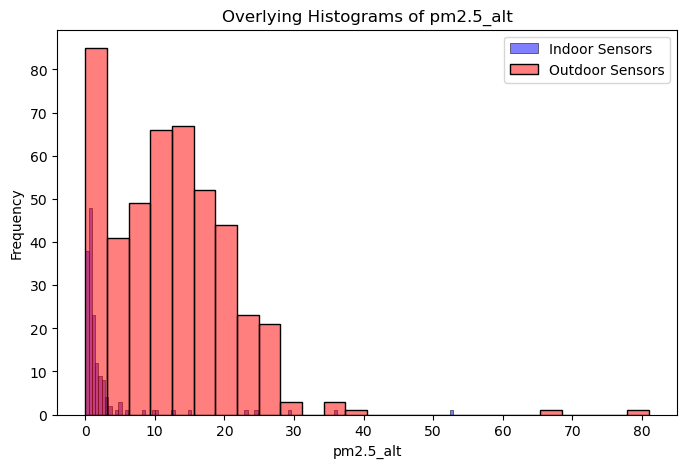

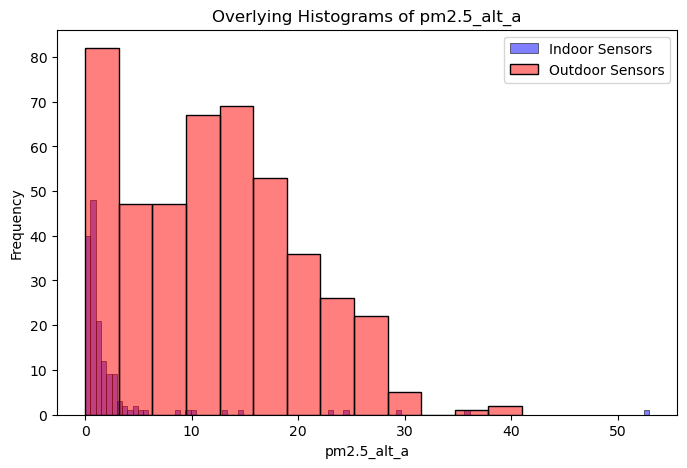

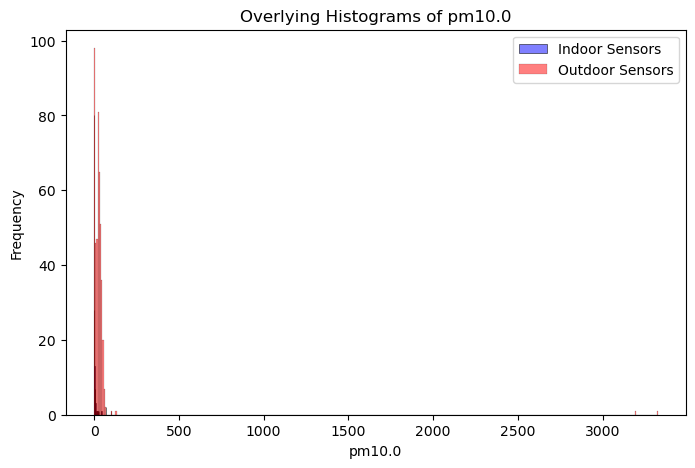

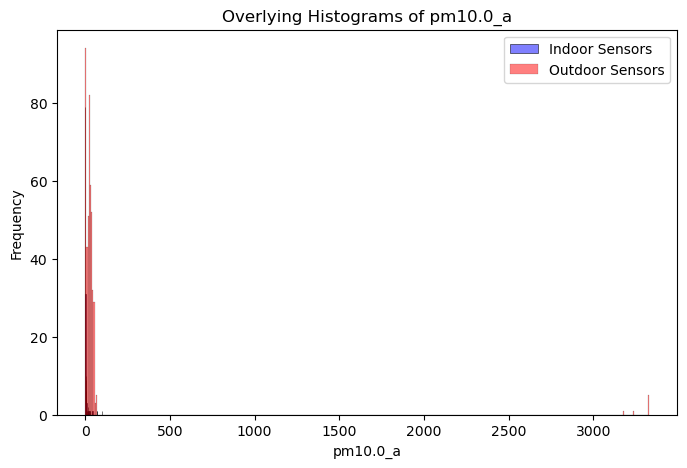

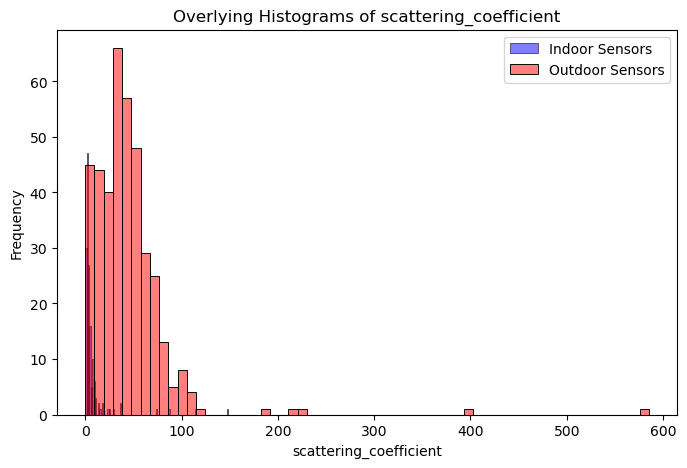

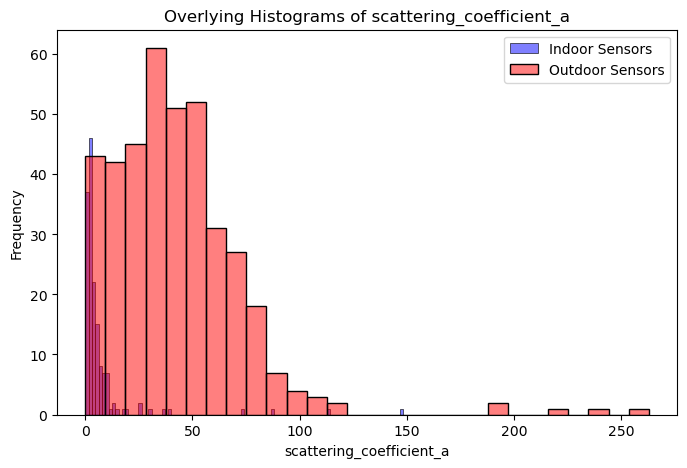

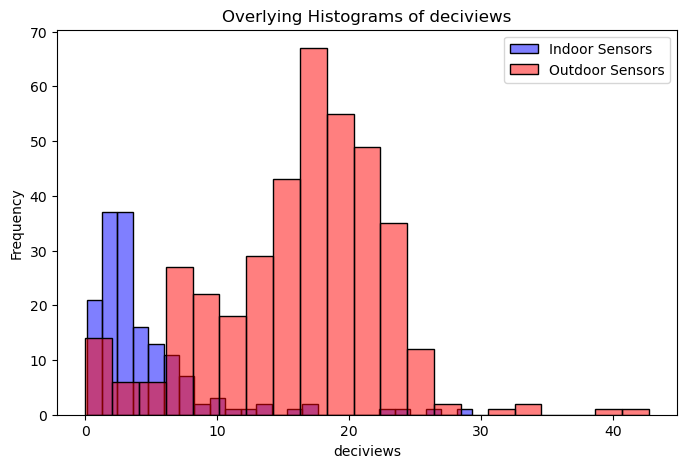

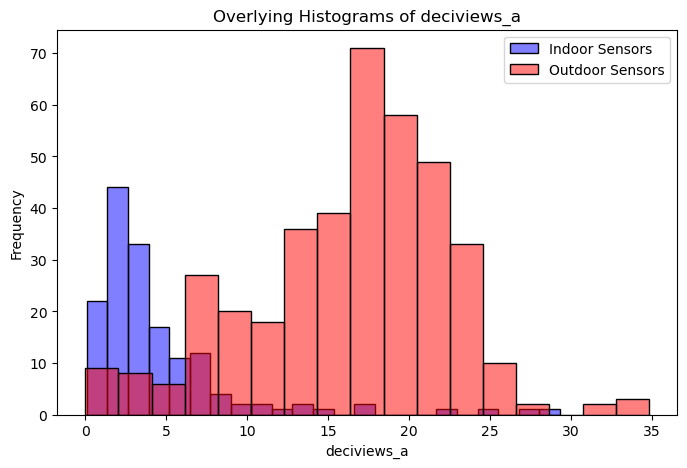

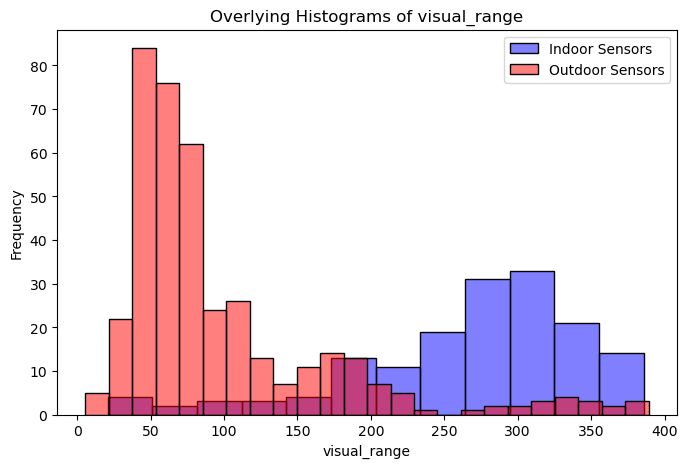

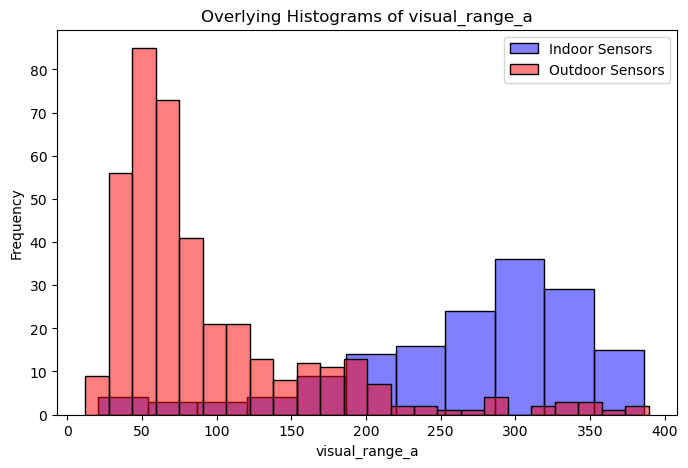

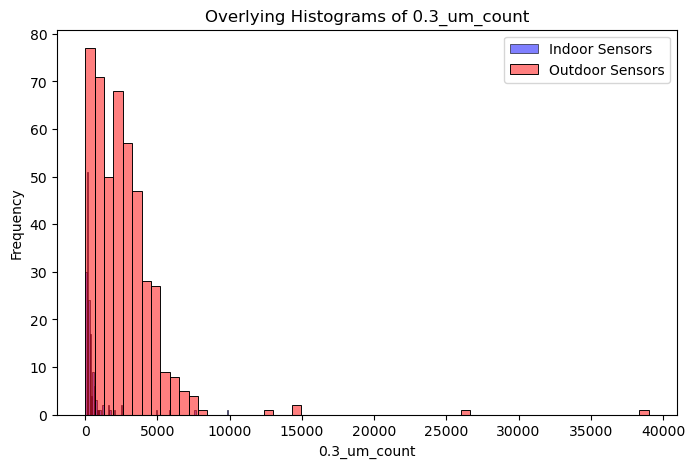

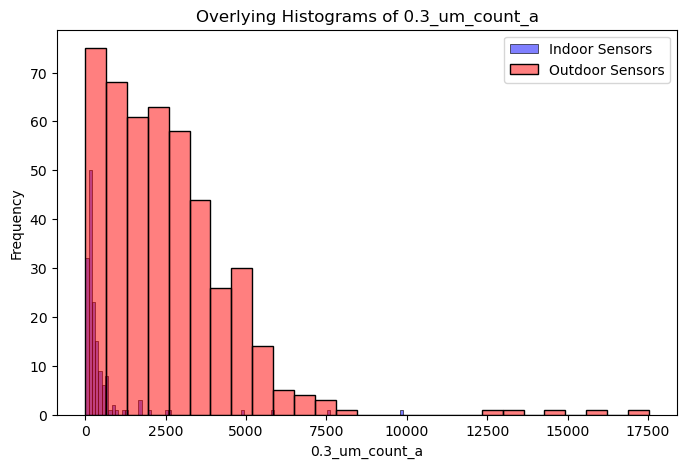

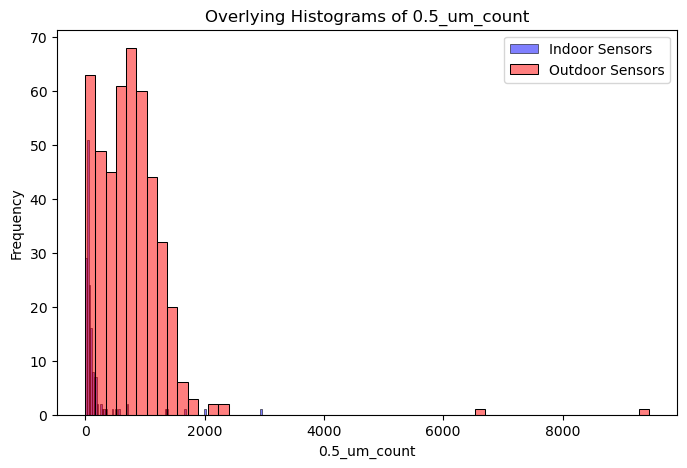

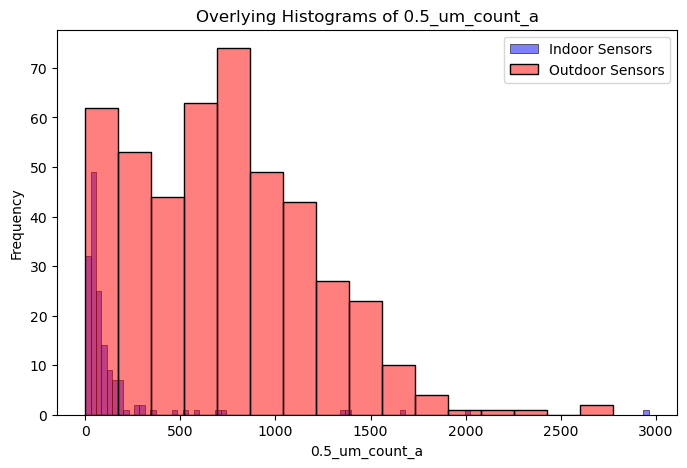

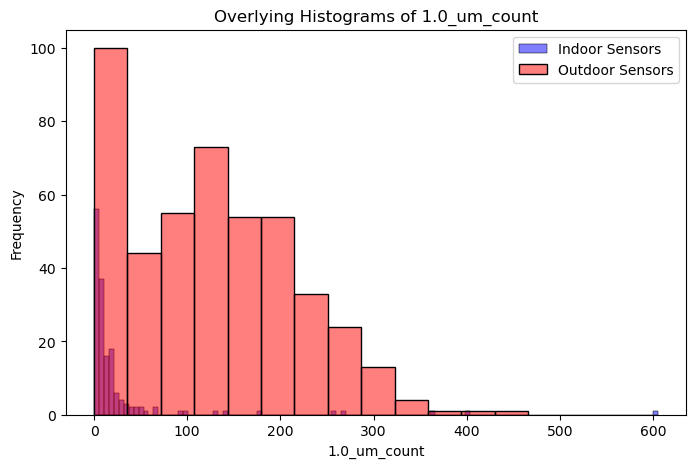

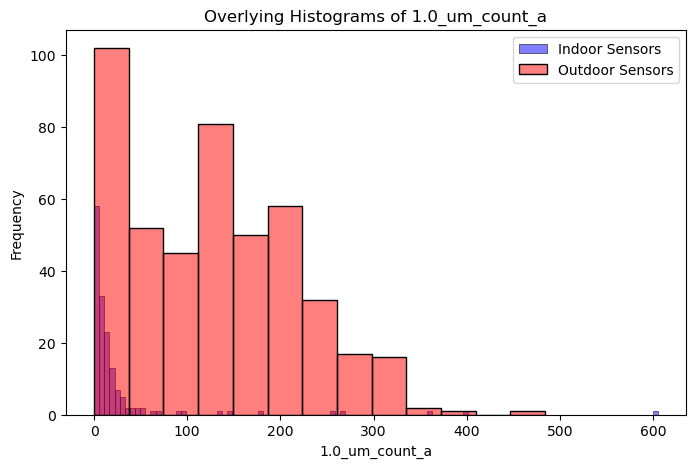

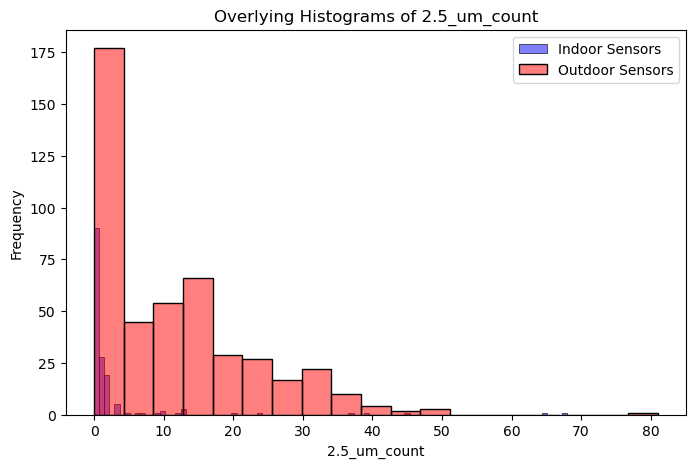

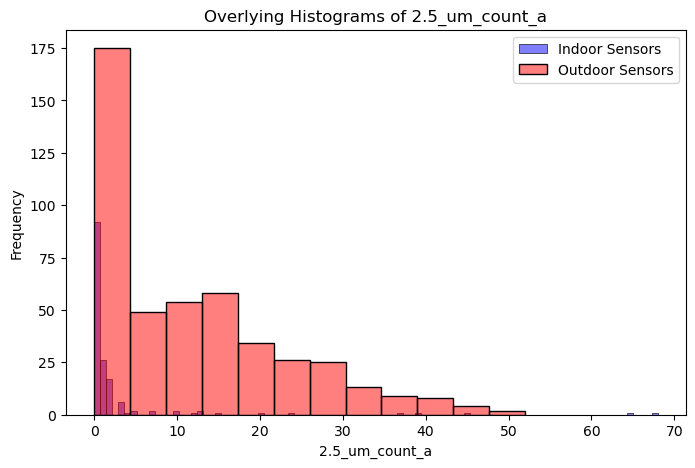

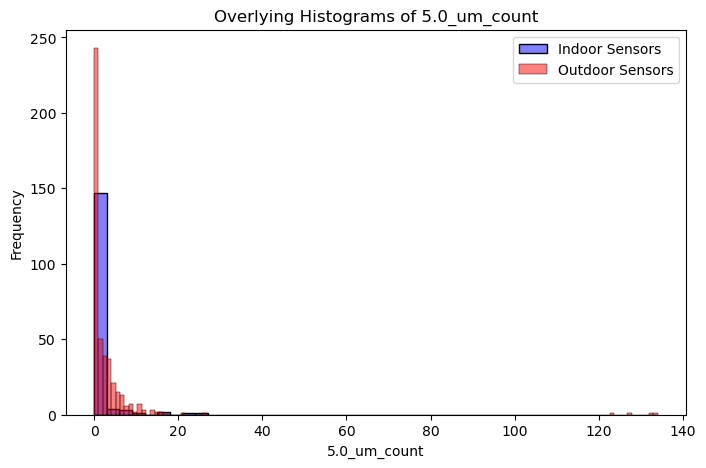

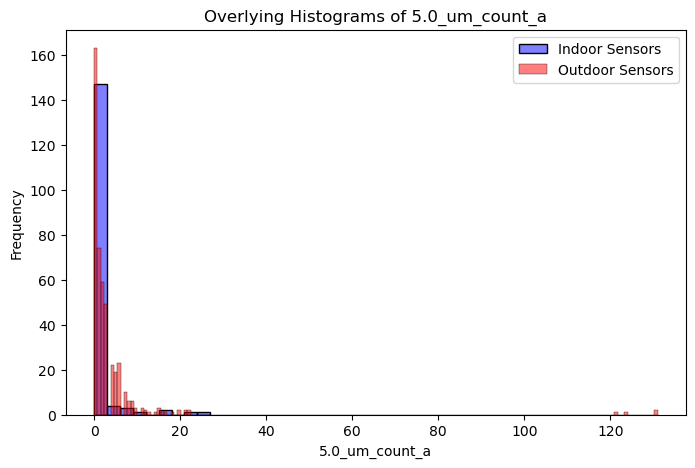

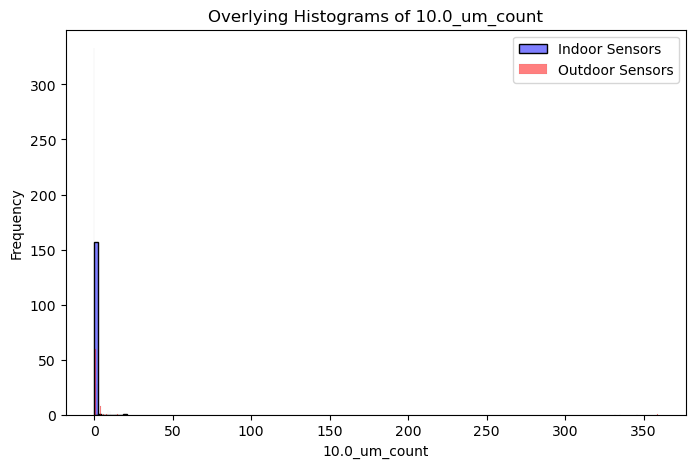

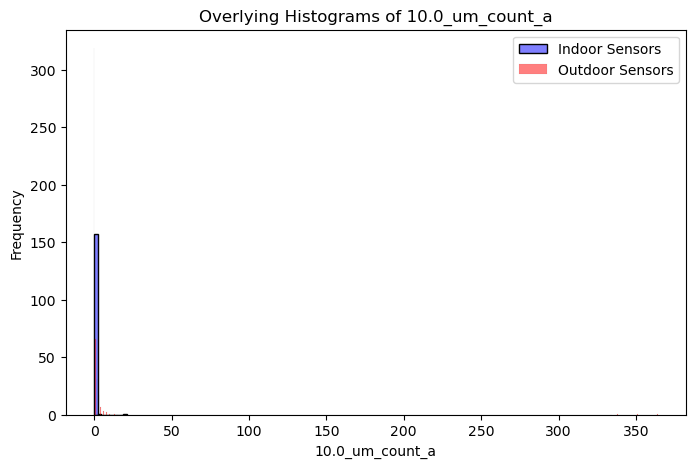

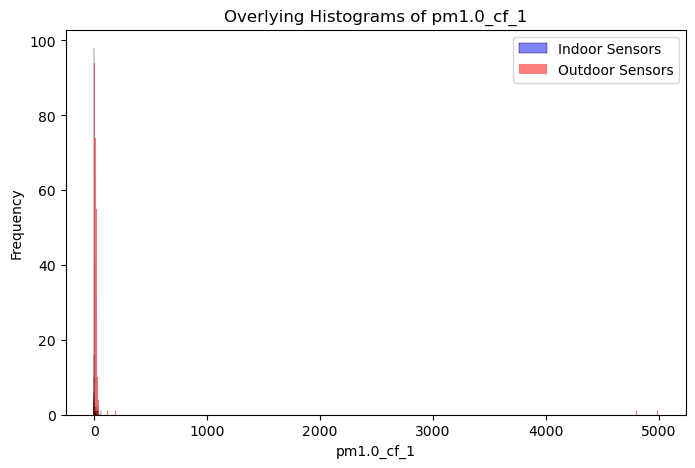

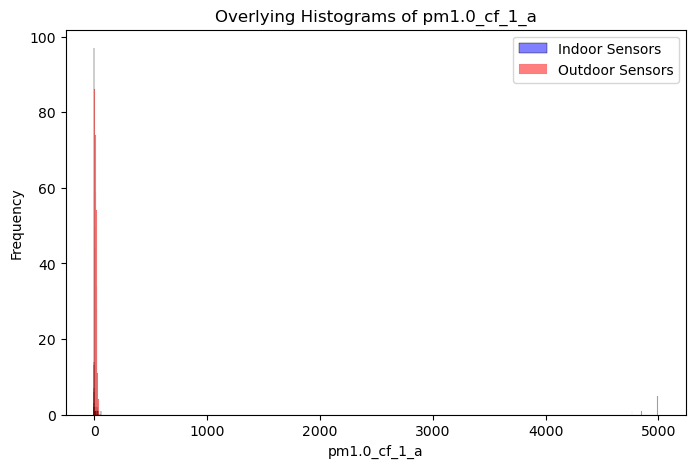

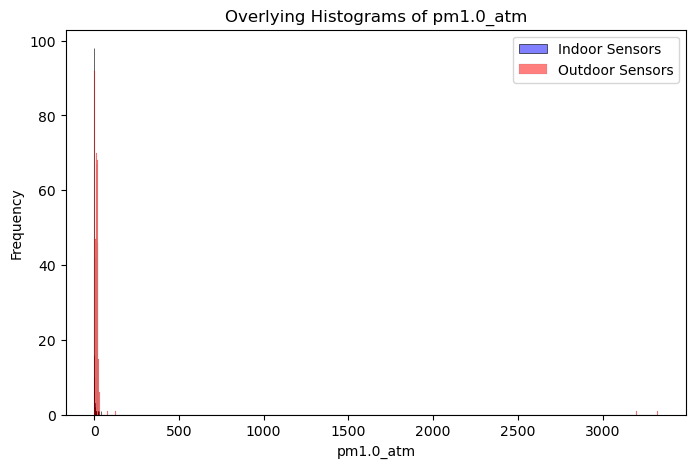

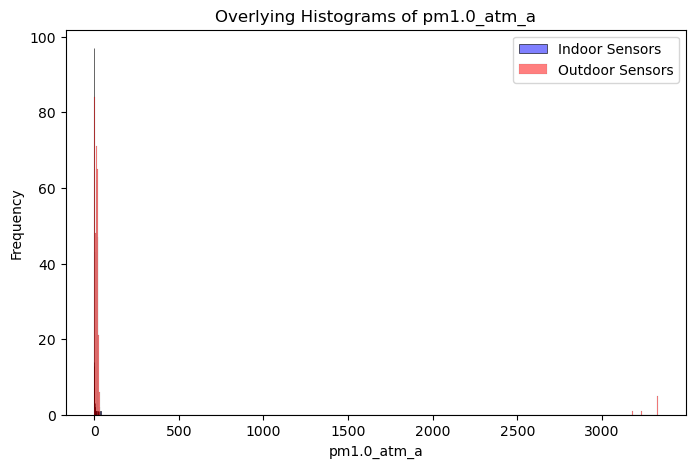

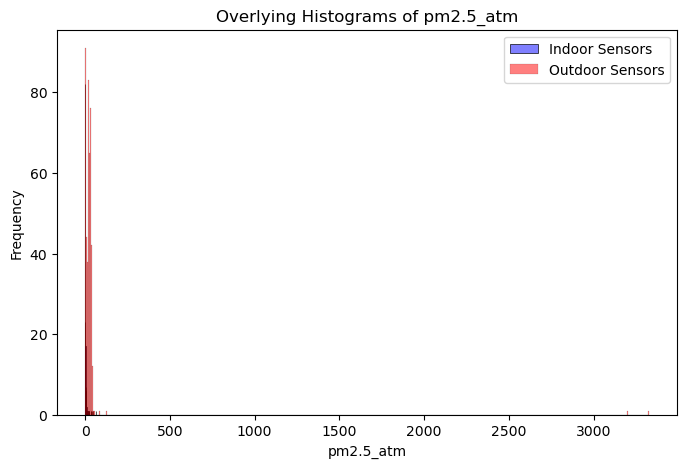

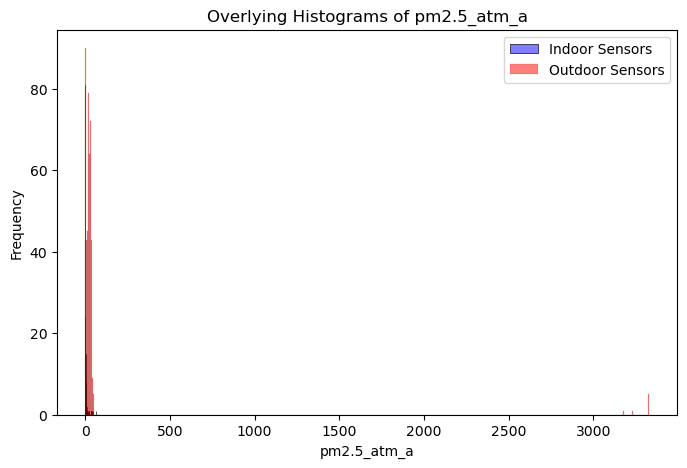

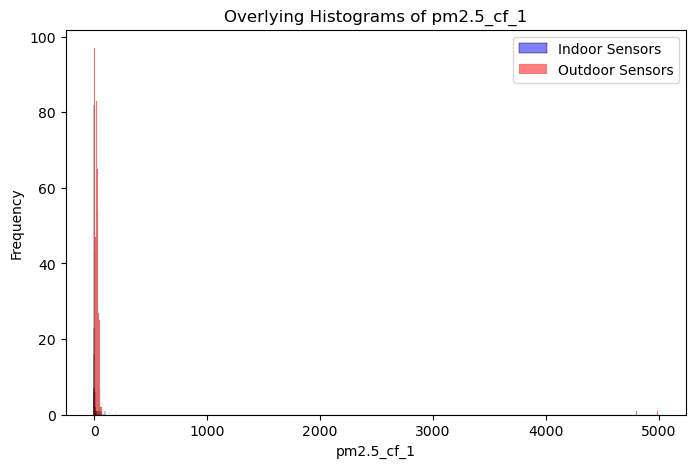

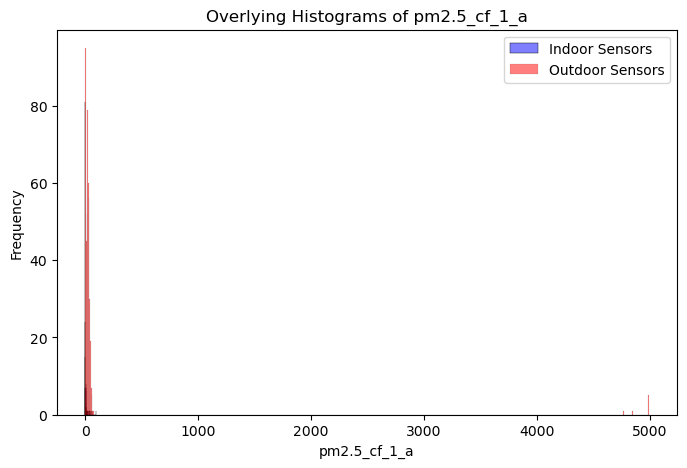

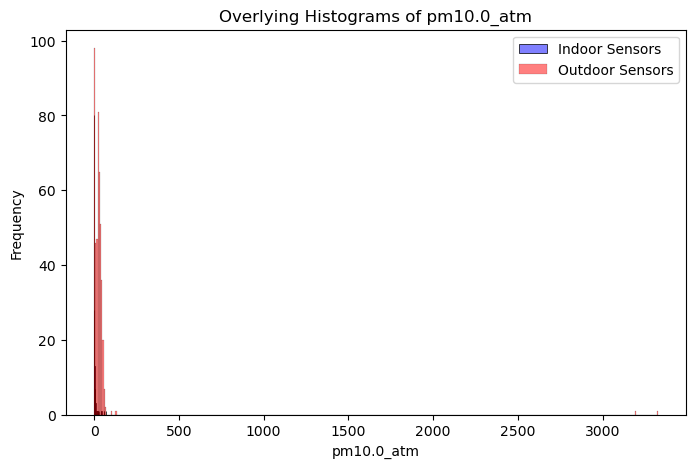

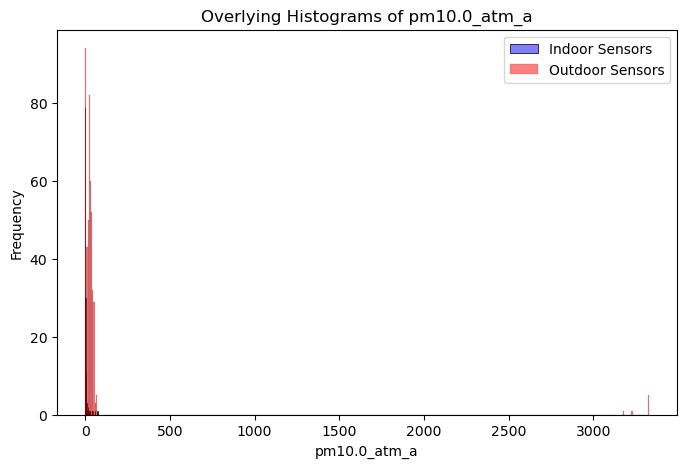

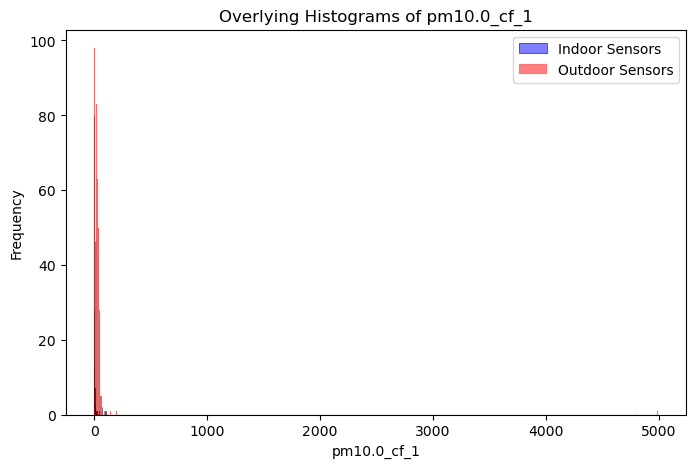

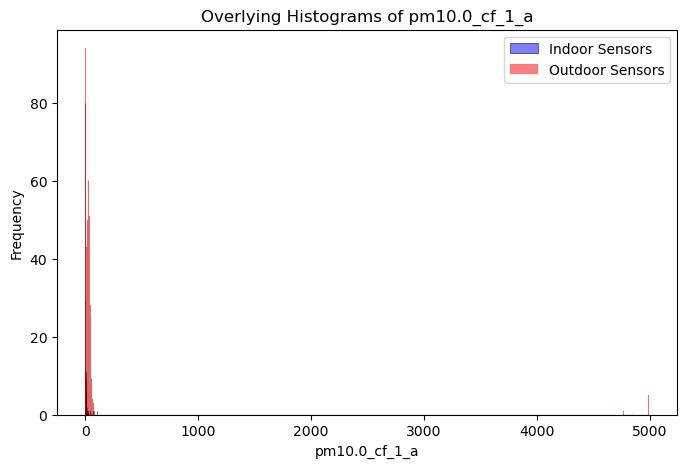

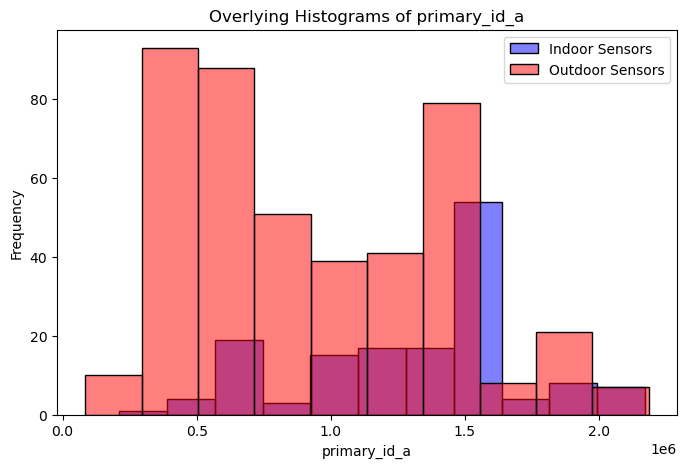

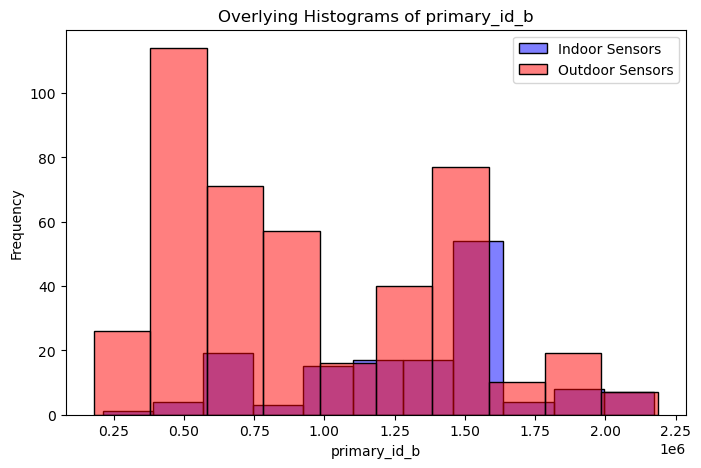

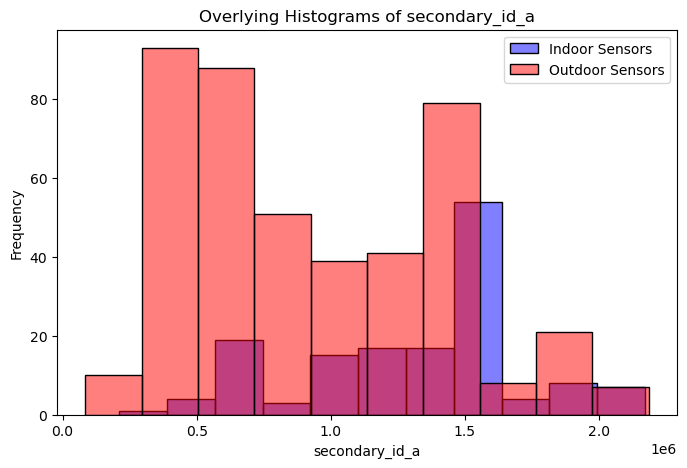

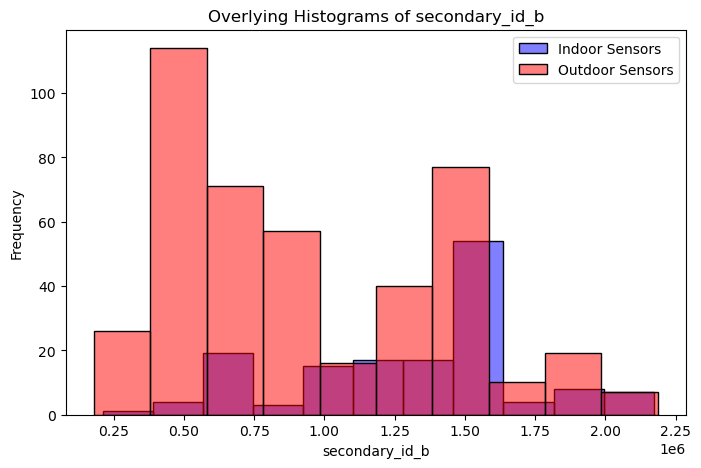

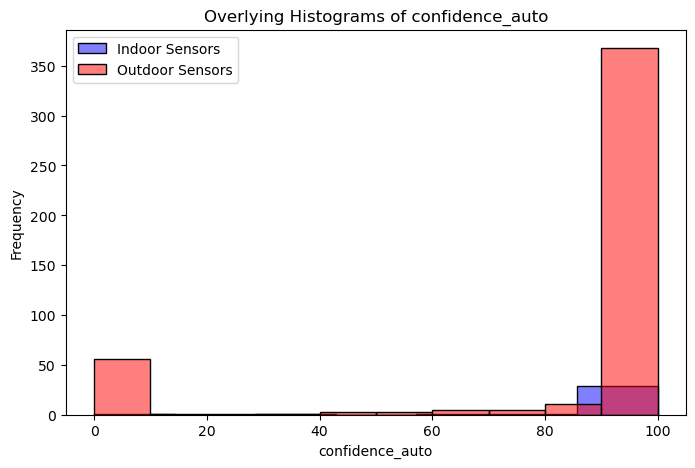

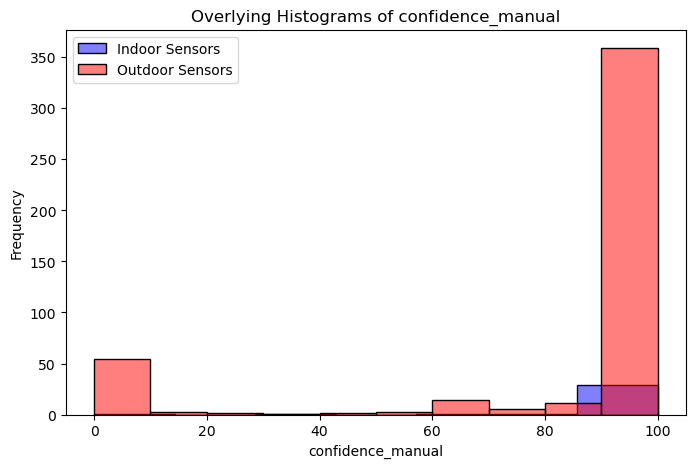

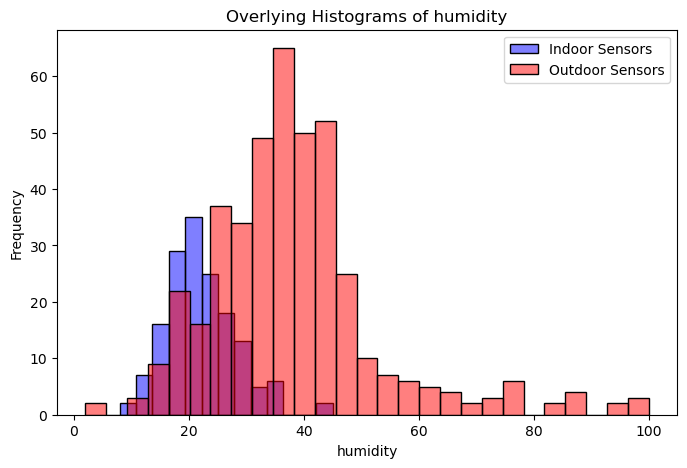

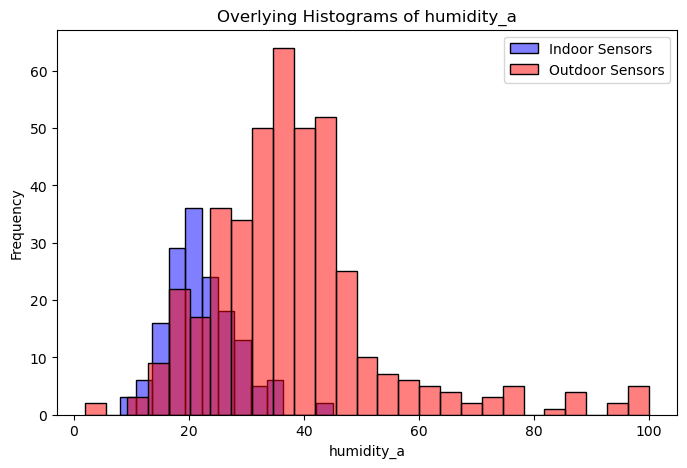

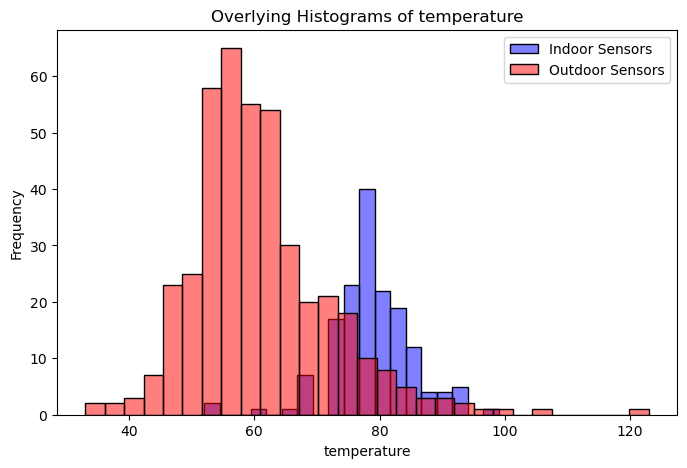

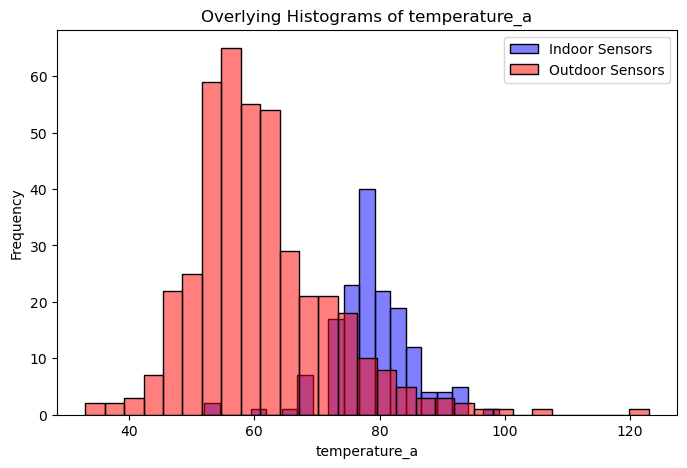

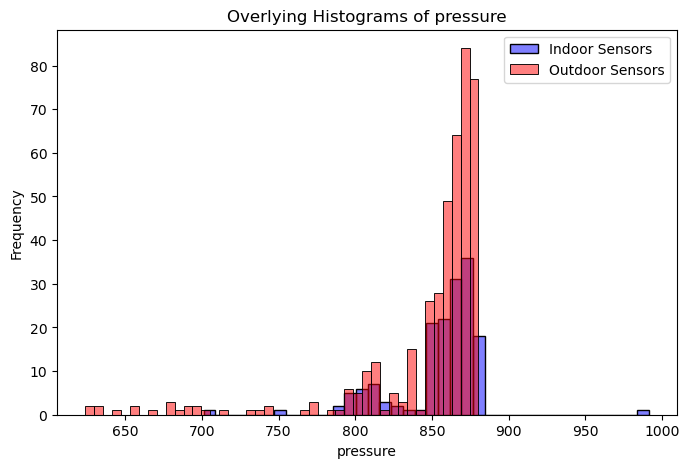

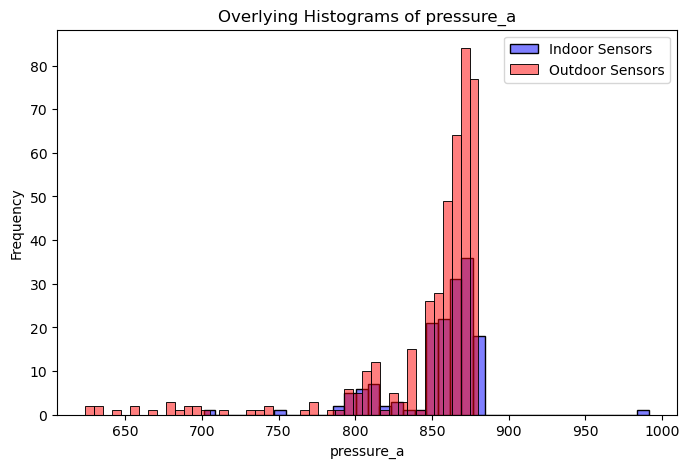

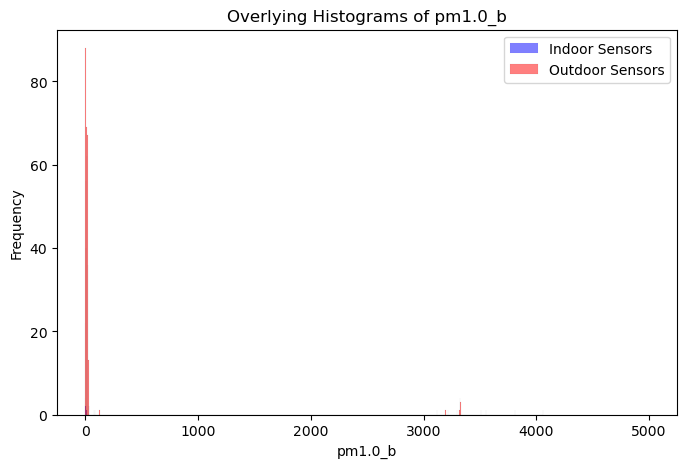

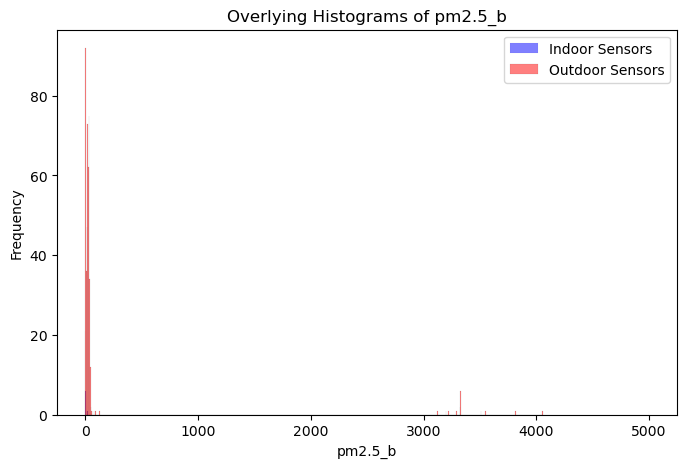

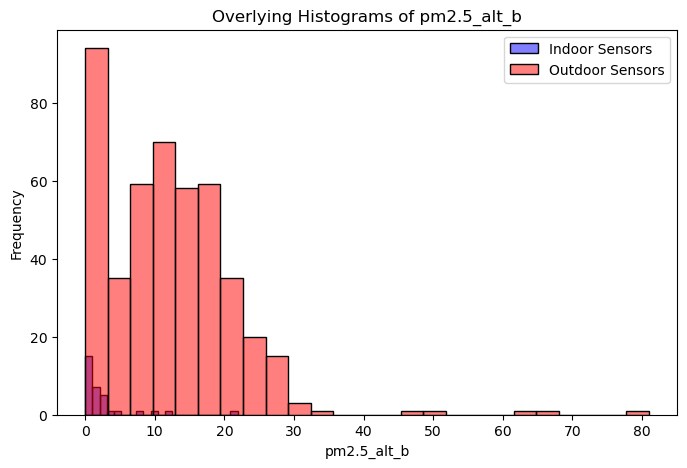

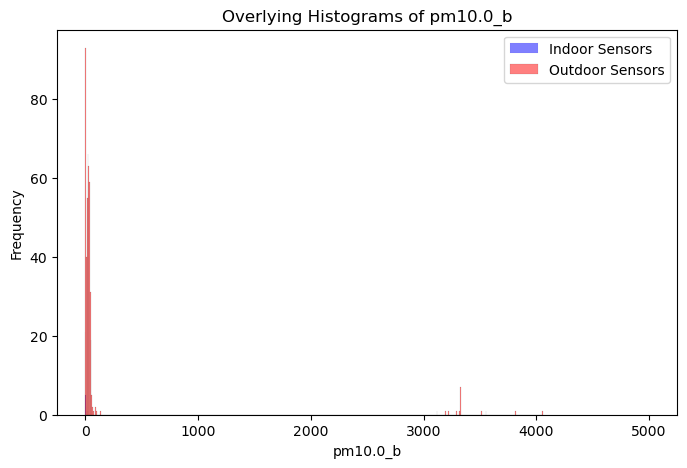

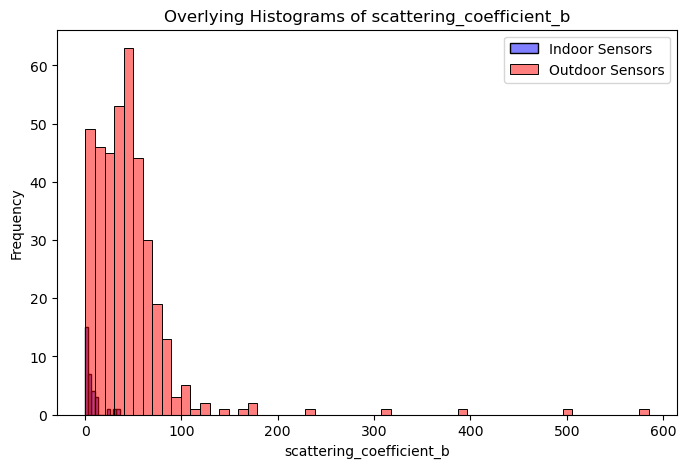

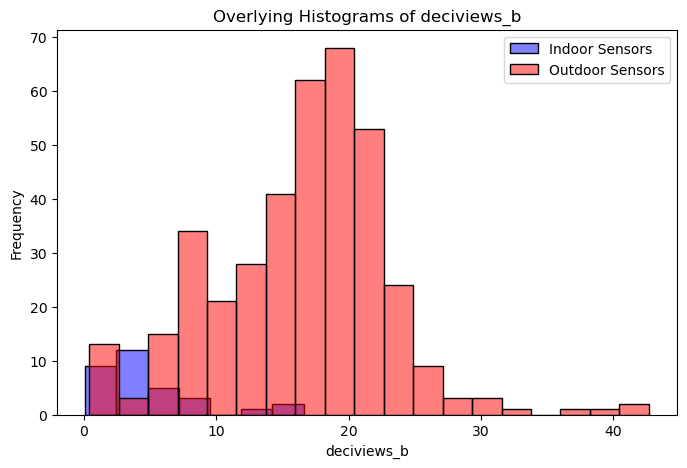

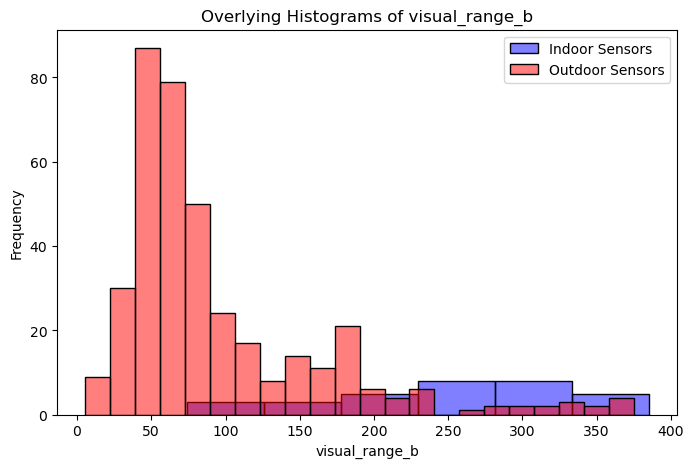

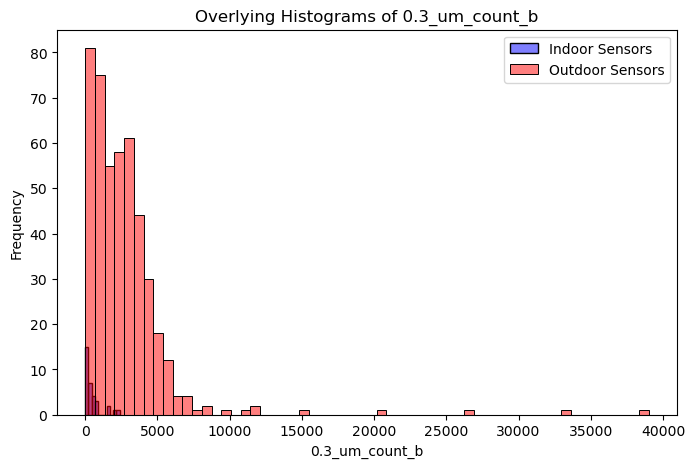

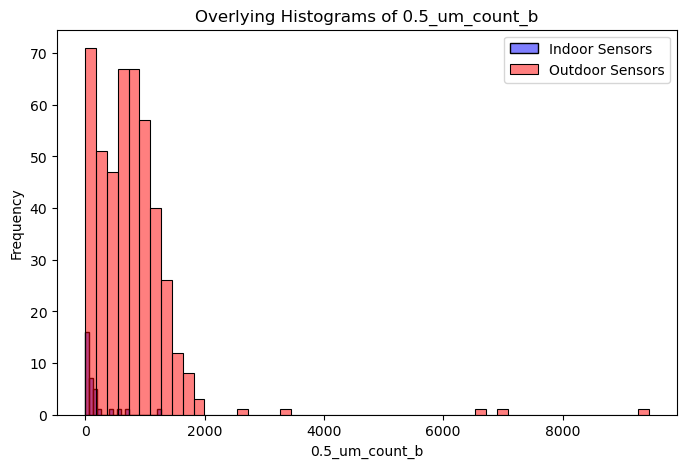

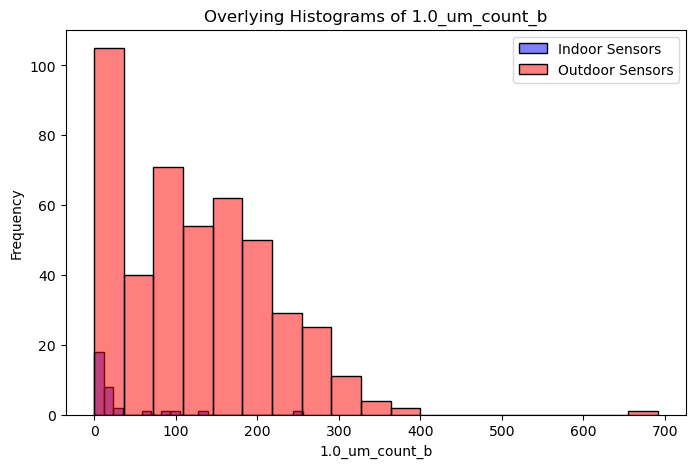

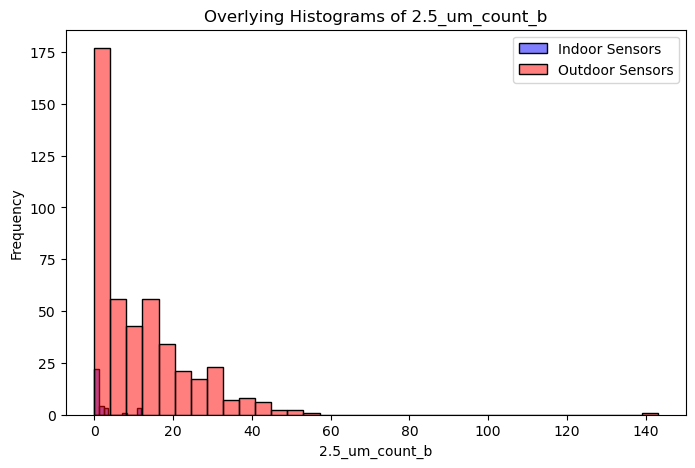

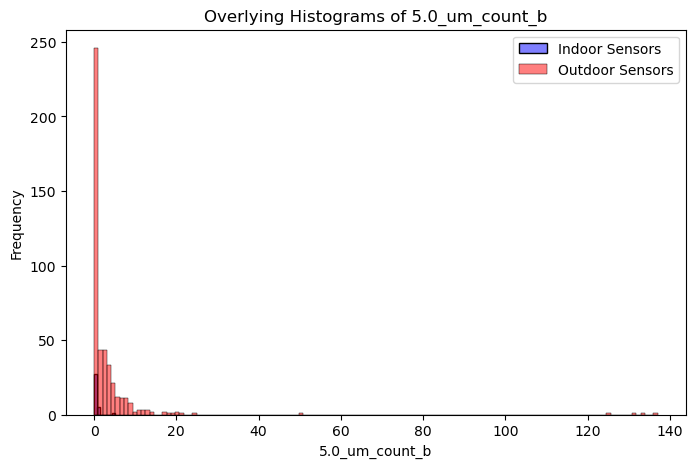

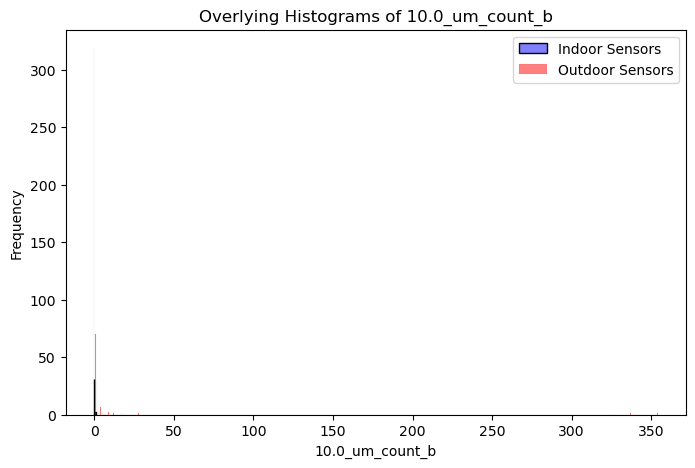

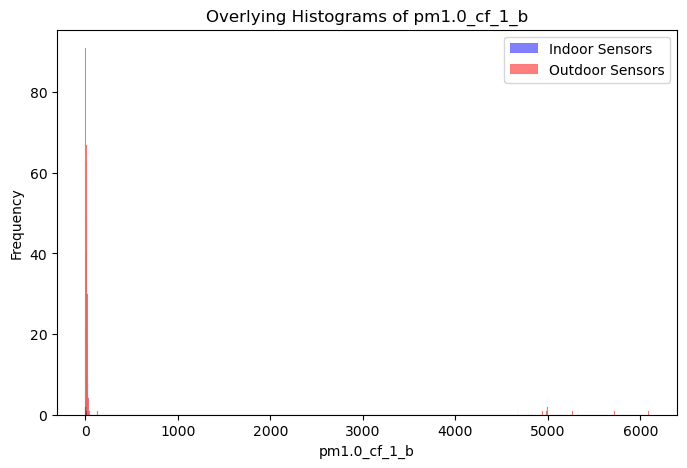

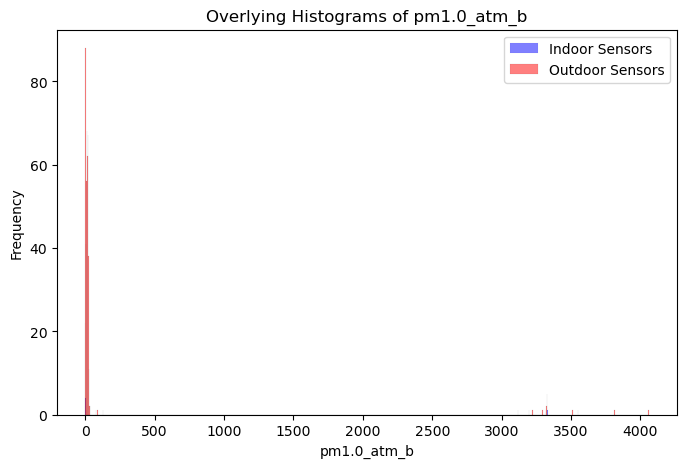

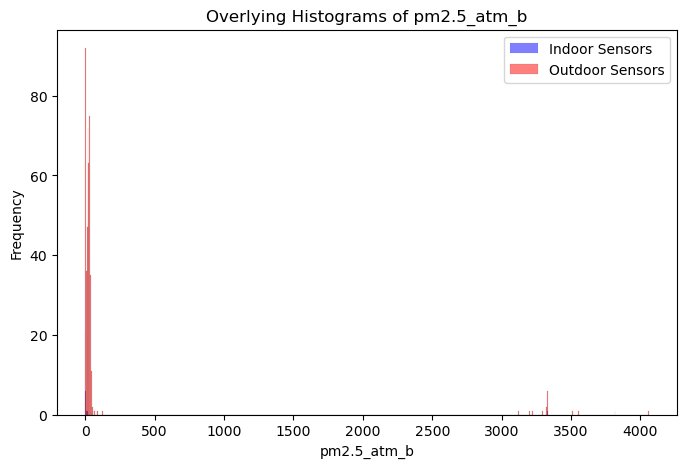

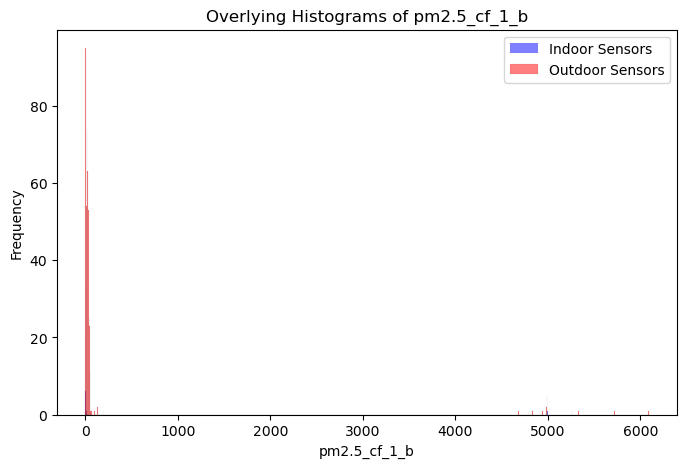

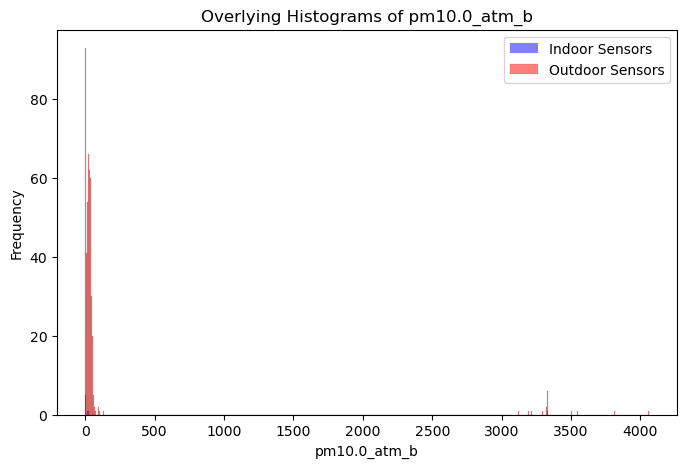

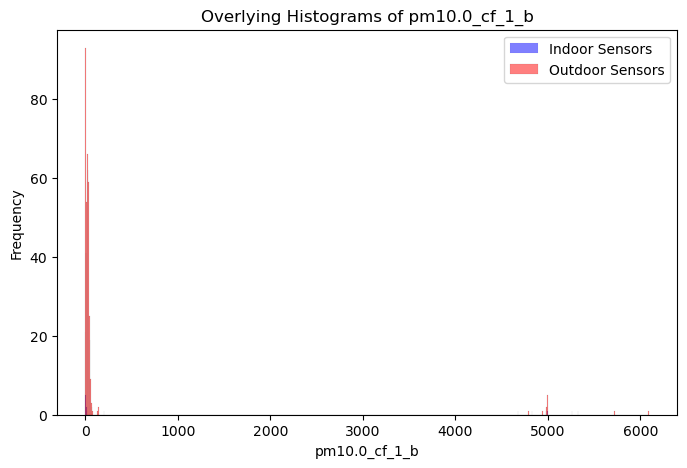

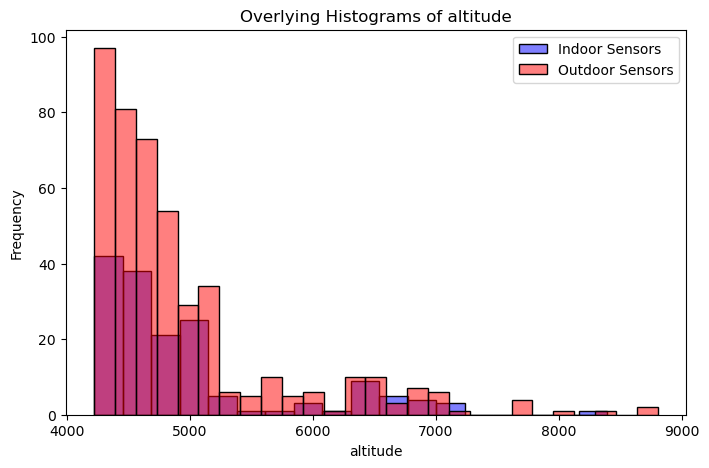

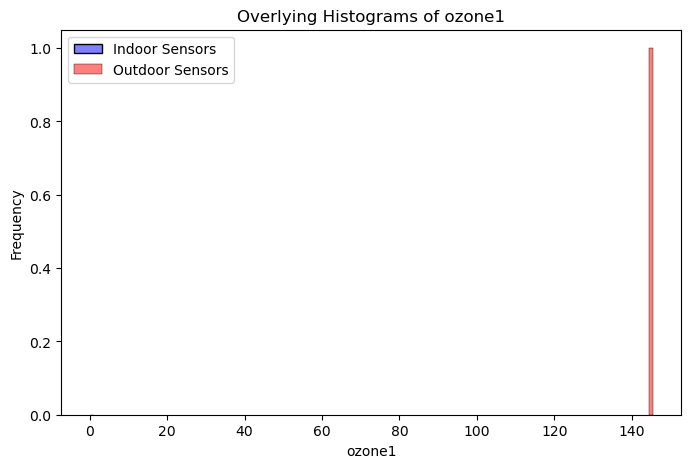

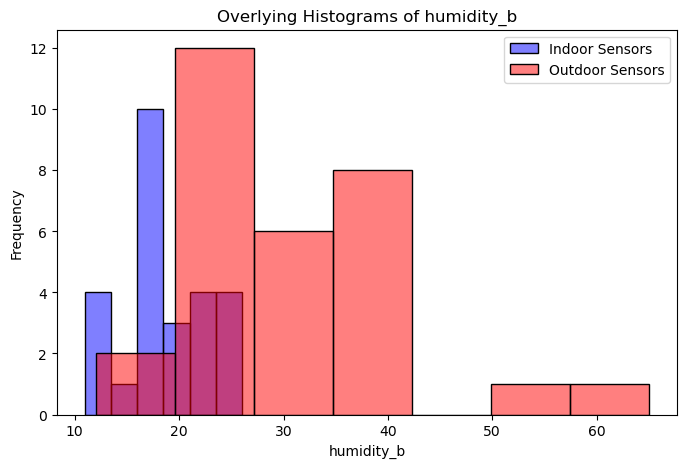

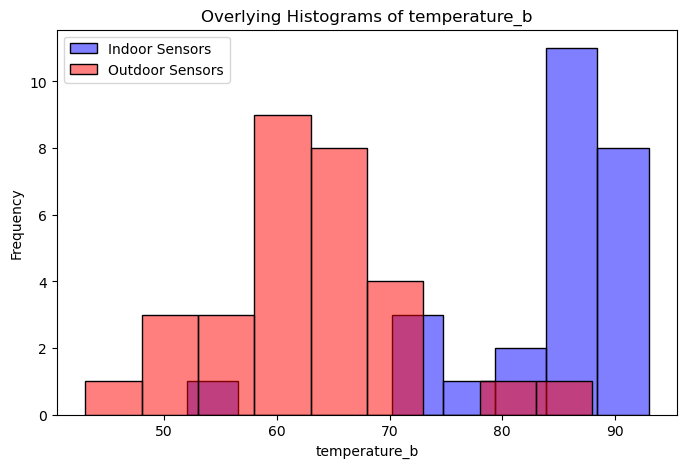

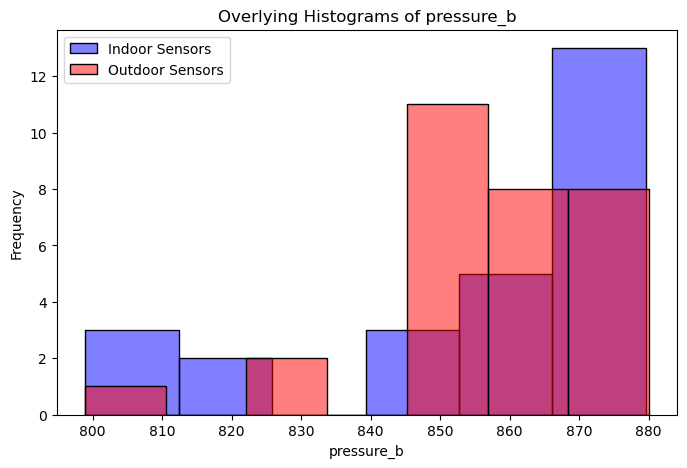

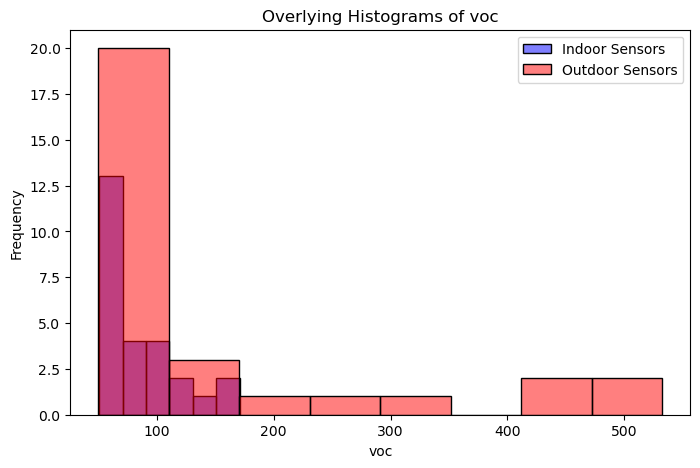

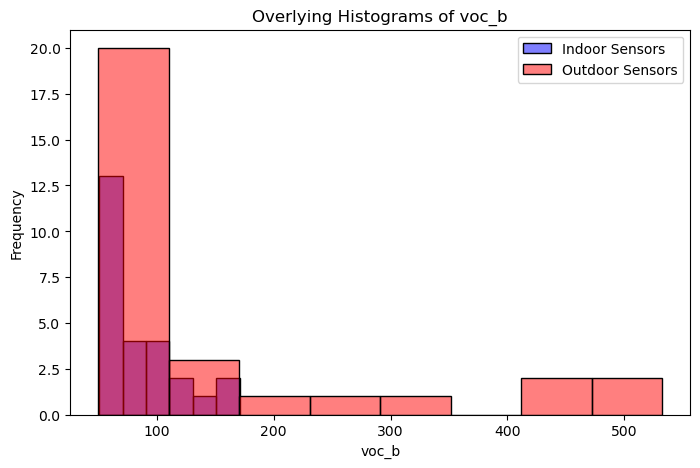

In [23]:
columns_of_interest = ['Unnamed: 0', 'sensor_index', 'led_brightness', 'rssi', 'uptime', 'pa_latency',
       'memory', 'position_rating', 'latitude', 'longitude', 'channel_state',
       'channel_flags', 'channel_flags_manual', 'channel_flags_auto',
       'confidence', 'analog_input', 'pm1.0', 'pm1.0_a', 'pm2.5', 'pm2.5_a',
       'pm2.5_alt', 'pm2.5_alt_a', 'pm10.0', 'pm10.0_a',
       'scattering_coefficient', 'scattering_coefficient_a', 'deciviews',
       'deciviews_a', 'visual_range', 'visual_range_a', '0.3_um_count',
       '0.3_um_count_a', '0.5_um_count', '0.5_um_count_a', '1.0_um_count',
       '1.0_um_count_a', '2.5_um_count', '2.5_um_count_a', '5.0_um_count',
       '5.0_um_count_a', '10.0_um_count', '10.0_um_count_a', 'pm1.0_cf_1',
       'pm1.0_cf_1_a', 'pm1.0_atm', 'pm1.0_atm_a', 'pm2.5_atm', 'pm2.5_atm_a',
       'pm2.5_cf_1', 'pm2.5_cf_1_a', 'pm10.0_atm', 'pm10.0_atm_a',
       'pm10.0_cf_1', 'pm10.0_cf_1_a', 'primary_id_a', 'primary_id_b',
       'secondary_id_a', 'secondary_id_b', 'confidence_auto',
       'confidence_manual', 'humidity', 'humidity_a', 'temperature',
       'temperature_a', 'pressure', 'pressure_a', 'pm1.0_b', 'pm2.5_b',
       'pm2.5_alt_b', 'pm10.0_b', 'scattering_coefficient_b', 'deciviews_b',
       'visual_range_b', '0.3_um_count_b', '0.5_um_count_b', '1.0_um_count_b',
       '2.5_um_count_b', '5.0_um_count_b', '10.0_um_count_b', 'pm1.0_cf_1_b',
       'pm1.0_atm_b', 'pm2.5_atm_b', 'pm2.5_cf_1_b', 'pm10.0_atm_b',
       'pm10.0_cf_1_b', 'altitude', 'ozone1', 'humidity_b', 'temperature_b',
       'pressure_b', 'voc', 'voc_b']

# column definitions can be found here under "Sensor data fields": https://api.purpleair.com/#api-sensors-get-sensor-data 

for column in columns_of_interest:
    plot_overlying_histograms(slc_sensor_eda_indoor, "Indoor Sensors", slc_sensor_eda_outdoor, "Outdoor Sensors", column)

# Removing Outliers
- pm1.0
- pm2.5
- pm10.0

In [24]:
# start with outdoor

pm_columns_outliers = ['sensor_index',
                       'pm1.0',
                       'pm2.5',
                       'pm10.0']

slc_sensor_eda_outdoor_outliers = slc_sensor_eda_outdoor[pm_columns_outliers]

In [25]:
slc_sensor_eda_outdoor_outliers.sort_values('pm1.0', ascending = False, inplace = True)
slc_sensor_eda_outdoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/406811541.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_outdoor_outliers.sort_values('pm1.0', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
517,129689,3325.8,3325.8,3325.8
450,120419,3198.8,3198.8,3198.8
94,7858,126.1,126.9,132.1
222,30917,77.4,86.4,98.5
593,195609,32.0,53.8,65.7


In [26]:
slc_sensor_eda_outdoor_outliers.sort_values('pm2.5', ascending = False, inplace = True)
slc_sensor_eda_outdoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/205108292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_outdoor_outliers.sort_values('pm2.5', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
517,129689,3325.8,3325.8,3325.8
450,120419,3198.8,3198.8,3198.8
94,7858,126.1,126.9,132.1
222,30917,77.4,86.4,98.5
593,195609,32.0,53.8,65.7


In [27]:
slc_sensor_eda_outdoor_outliers.sort_values('pm10.0', ascending = False, inplace = True)
slc_sensor_eda_outdoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/2380824529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_outdoor_outliers.sort_values('pm10.0', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
517,129689,3325.8,3325.8,3325.8
450,120419,3198.8,3198.8,3198.8
94,7858,126.1,126.9,132.1
222,30917,77.4,86.4,98.5
369,90285,30.0,52.3,68.6


In [28]:
slc_sensor_eda_outdoor.loc[slc_sensor_eda_outdoor['sensor_index'].isin([129689, 120419])]

,Unnamed: 0,sensor_index,private,is_owner,icon,location_type,led_brightness,rssi,uptime,pa_latency,...,pm2.5_cf_1_b,pm10.0_atm_b,pm10.0_cf_1_b,altitude,ozone1,humidity_b,temperature_b,pressure_b,voc,voc_b
450,450,120419,0,0,0,0,35,-67,59281,272.0,...,4830.98,3219.78,4830.98,4547.0,NaN,NaN,NaN,NaN,NaN,NaN
517,517,129689,0,0,0,0,35,-73,53126,304.0,...,4986.04,3323.28,4986.04,4611.0,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# drop outdoor sensor outliers

outdoor_index_names = slc_sensor_eda_outdoor[(slc_sensor_eda_outdoor['sensor_index'] == 129689) | (slc_sensor_eda_outdoor['sensor_index'] == 120419)].index 

slc_sensor_eda_outdoor.drop(outdoor_index_names, inplace = True) 

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/2908848508.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_outdoor.drop(outdoor_index_names, inplace = True)


In [30]:
# do the same for indoor
slc_sensor_eda_indoor_outliers = slc_sensor_eda_indoor[pm_columns_outliers]

In [31]:
slc_sensor_eda_indoor_outliers.sort_values('pm1.0', ascending = False, inplace = True)
slc_sensor_eda_indoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/599006671.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_indoor_outliers.sort_values('pm1.0', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
331,74623,58.5,95.3,101.8
549,160897,38.4,62.6,69.9
283,43477,29.9,52.2,69.4
475,124713,26.1,42.0,43.7
502,128375,25.9,38.2,42.7


In [32]:
slc_sensor_eda_indoor_outliers.sort_values('pm2.5', ascending = False, inplace = True)
slc_sensor_eda_indoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/1285224507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_indoor_outliers.sort_values('pm2.5', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
331,74623,58.5,95.3,101.8
549,160897,38.4,62.6,69.9
283,43477,29.9,52.2,69.4
475,124713,26.1,42.0,43.7
502,128375,25.9,38.2,42.7


In [33]:
slc_sensor_eda_indoor_outliers.sort_values('pm10.0', ascending = False, inplace = True)
slc_sensor_eda_indoor_outliers.head(5)

/var/folders/qy/2qlsgz6s43xbn14whr8v3sbh0000gn/T/ipykernel_31779/1073738246.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  slc_sensor_eda_indoor_outliers.sort_values('pm10.0', ascending = False, inplace = True)


,sensor_index,pm1.0,pm2.5,pm10.0
331,74623,58.5,95.3,101.8
549,160897,38.4,62.6,69.9
283,43477,29.9,52.2,69.4
475,124713,26.1,42.0,43.7
502,128375,25.9,38.2,42.7


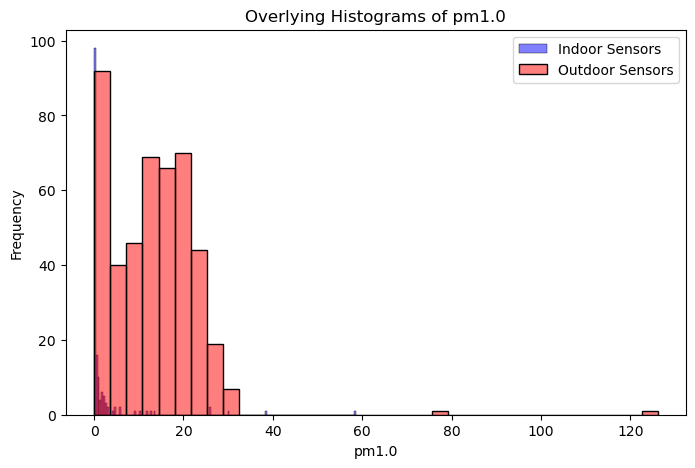

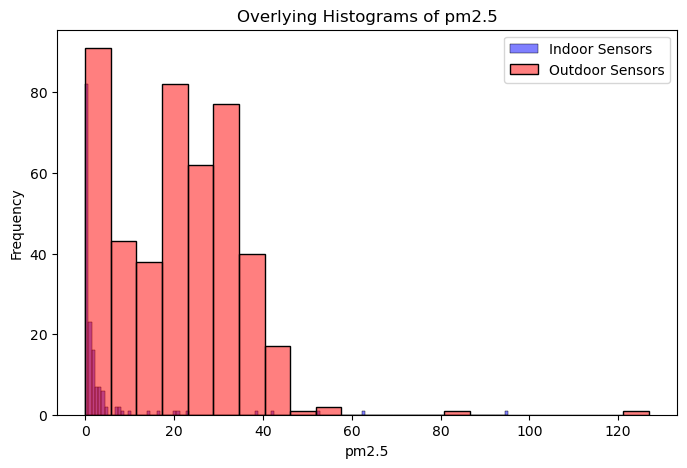

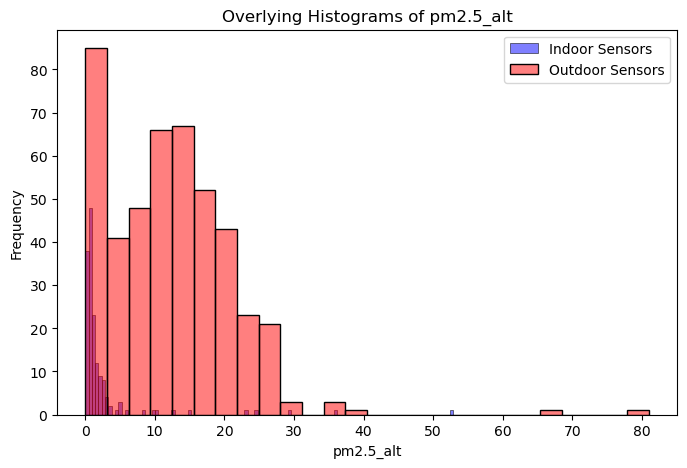

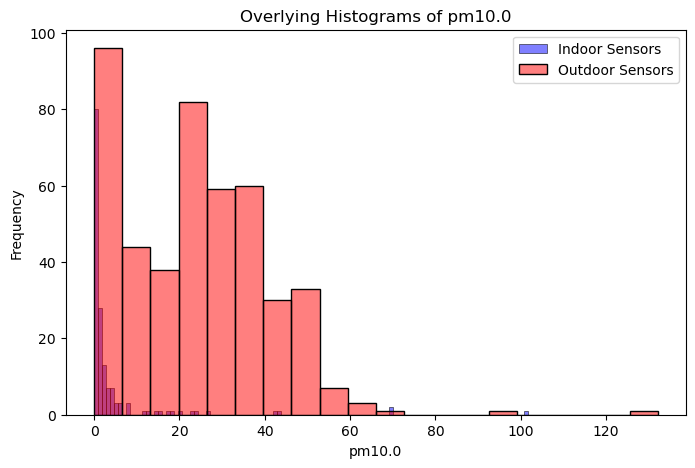

In [36]:
pm_columns = ['pm1.0', 'pm2.5', 'pm2.5_alt', 'pm10.0']

for column in pm_columns:
    plot_overlying_histograms(slc_sensor_eda_indoor, "Indoor Sensors", slc_sensor_eda_outdoor, "Outdoor Sensors", column)